# Info
Name:  

    pmom_mie_expansion

Purpose:  

    Explore the pmom expansion of mie values, with the delta-m scaling factor for the legendre polynomial expansion
    And testing of the tools within libradtran
  
Input:

    none at command line

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    
  
Needed Files:

    - mie_hi.out
    - phase input and output files from seperate deltam runs and phase runs
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-12-06
    Modified: Samuel LeBlanc, Santa Cruz, CA, 2020-11-16
              - updated for a new set of mie calculations, with nthetamax = 1500, and reff 0.5-20 at 0.5 um resolution

# Load the required modules and set up the paths

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
from path_utils import getpath

In [66]:
%matplotlib notebook

In [2]:
fp = getpath('libradtran')
fp

Return path named:  libradtran /home/sam/libradtran/libRadtran-2.0.2/


u'/home/sam/libradtran/libRadtran-2.0.2/'

In [6]:
fs = getpath('4STAR')
fs

Return path named:  4STAR /data/sam/4STAR/


u'/data/sam/4STAR/'

In [9]:
frtm = getpath('rtm_home')

Return path named:  rtm_home /home/sam/rtm/


# Load the files

## Load the 2017 runs

### Load the original mie_hi.out file with all the pahse functions and non-scaled legendre polynomials

In [345]:
m = sio.idl.readsav(fs+'rtm_dat/mie_hi.out')

In [346]:
m.keys()

['ntheta',
 'pmom',
 'rho',
 'nmom',
 'ssa',
 'nim',
 'nre',
 'ext',
 'wvl',
 'phase',
 'theta',
 'ref']

In [347]:
with open(fs+'rtm_dat/phase_an.txt','w') as f:
    f.write('{:4.0f}\n'.format(m['ntheta'][25,200]))
    for i in xrange(m['ntheta'][25,200],0,-1):
        f.write('{} {}\n'.format(m['theta'][25,200,i-1],m['phase'][25,200,i-1]))

### Load the calculated legendre polynomials with delta-m scaling factor
After subjecting the phase_an.txt to deltam program from Y. Hu's program compiled to deltam:

./deltam3 ../../4STAR/rtm_dat/phase_an.txt pph.out 300

#sed -i '1d' pph.out

In [48]:
pmom = np.genfromtxt(fp+'ice/pph.out')

In [49]:
pmom

array([ 1.        ,  0.87419212,  0.80467701,  0.68937874,  0.61053556,
        0.5687679 ,  0.52886587,  0.51694739,  0.50443232,  0.4933002 ,
        0.49259964,  0.48415196,  0.48276731,  0.48088637,  0.47611678,
        0.47687534,  0.47342855,  0.47131604,  0.47149143,  0.46709567,
        0.46737325,  0.46507001,  0.46231365,  0.46257248,  0.45918205,
        0.45810375,  0.45734352,  0.45386141,  0.45407185,  0.45149669,
        0.44956514,  0.44913909,  0.44611394,  0.44528294,  0.44383314,
        0.4412742 ,  0.44095641,  0.43840653,  0.43714485,  0.43595219,
        0.43360409,  0.4327881 ,  0.43085203,  0.42910871,  0.42819777,
        0.42588162,  0.42495036,  0.42322734,  0.42146575,  0.42044994,
        0.41845649,  0.41716477,  0.41578654,  0.41386697,  0.41289574,
        0.41101062,  0.40965992,  0.40830439,  0.40654707,  0.405359  ,
        0.40375641,  0.40224716,  0.40104604,  0.39931124,  0.39812151,
        0.39656758,  0.39508995,  0.39379579,  0.39221478,  0.39

### Load the calculated phase function
After subjecting the delta-m scaled legendre polynomials expansion to phase program within libradtran:

$RES/libradtran/libRadtran-2.0.1/bin/phase -f -c -d ./pph.out > pphase.out

In [50]:
phase = np.genfromtxt(fp+'ice/pphase.out')

In [51]:
phase

array([[  0.00000000e+00,   5.82295397e+03,   2.00000000e+00],
       [  1.00000000e-02,   5.82211118e+03,   1.99991132e+00],
       [  2.00000000e-02,   5.81958348e+03,   1.99964535e+00],
       ..., 
       [  1.79980000e+02,   5.59046161e-01,   3.40650514e-08],
       [  1.79990000e+02,   5.59194193e-01,   8.51739412e-09],
       [  1.80000000e+02,   5.59243556e-01,   0.00000000e+00]])

In [52]:
phase.shape

(18001, 3)

## Load the 2020 runs

### Load the netcdf file
Output from libradtran's mie calculations.  

Input file:  

`mie_program MIEV0
refrac water
r_eff 0.5 20 0.5
distribution gamma 7
wavelength 350 1700
wavelength_step 1
nstokes 1
nthetamax 1500
nmom 0
output_user netcdf
verbose
basename mie_wc_run2020112_SL`


And Other input file:  
  
`mie_program MIEV0
refrac water
r_eff 15 20 0.5
distribution gamma 7
wavelength 350 550
wavelength_step 1
nstokes 1
nthetamax 2500
nmom 0
output_user netcdf
verbose
basename mie_wc_run2020115_largeonly_SL`

In [10]:
import load_utils as lu

In [612]:
vv = 'run2020112_SL'

In [15]:
mi,mi_dict = lu.load_netcdf(frtm+'mie_wc_{}mie.cdf'.format(vv),everything=True)

Reading file: /home/sam/rtm/mie_wc_run2020112_SLmie.cdf
Outputting the Data subdatasets:
0: wavelen
1: reff
2: ntheta
3: theta
4: phase
5: nmom
6: pmom
7: ext
8: ssa
9: gg
10: refre
11: refim
12: rho
['ntheta', 'pmom', 'nmom', 'refre', 'wavelen', 'gg', 'ext', 'refim', 'rho', 'phase', 'theta', 'ssa', 'reff']


In [17]:
mi['ntheta'].shape

(1351, 40, 1)

In [20]:
mi['wavelen'][150]

0.5

In [22]:
mi['phase'].shape

(1351, 40, 1, 1500)

In [23]:
mi['reff'].shape

(40,)

In [28]:
mi['theta'][0,0,0,:]

masked_array(data=[180.0, 178.0, 177.0, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-999.0,
            dtype=float32)

In [25]:
mi['phase'][0,0,0,:]

masked_array(data=[0.27742892503738403, 0.2515917420387268,
                   0.22525808215141296, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-999.0,
            dtype=float32)

In [38]:
for u,g in enumerate(mi['pmom'][0,0,0,:].compressed()):
    print u,g

0 1.0
1 2.2663567
2 3.2071047
3 3.3931117
4 3.6008728
5 3.595178
6 3.5809112
7 3.5617921
8 3.4390638
9 3.358161
10 3.1353865
11 2.9804316
12 2.6827235
13 2.4756012
14 2.1543396
15 1.92553
16 1.6324522
17 1.4078314
18 1.1750239
19 0.97242975
20 0.80849665
21 0.6379159
22 0.5346984
23 0.3995195
24 0.34141782
25 0.24010529
26 0.21123046
27 0.13915022
28 0.12697726
29 0.07810375
30 0.074304715
31 0.042648908
32 0.042377383
33 0.022734154
34 0.023640882
35 0.01189444
36 0.01289662
37 0.0060401703
38 0.0068245674
39 0.0030288287
40 0.0035819204
41 0.0015166156
42 0.0018373352
43 0.0007635162
44 0.0009332383
45 0.00036854885
46 0.00045751387
47 0.00017044847
48 0.00022142923
49 8.4764884e-05
50 0.000115682415
51 3.9887414e-05
52 5.014526e-05
53 1.9977868e-05
54 2.5569292e-05
55 8.568051e-06


### Build the inputs to libradtran's pmom

In [24]:
from tqdm import tqdm_notebook as tqdm

In [37]:
'r{:04.1f}'.format(7.5)

'r07.5'

In [45]:
theta = mi['theta'][:,:,0,:0:-1]

In [49]:
for i,p in enumerate(mi['phase'][0,0,0,:0:-1].compressed()):
    print mi['theta'][0,0,0,:0:-1].compressed()[i],i,p

0.0 0 55.318504
5.0 1 43.018593
7.0 2 34.246906
8.0 3 29.904001
9.0 4 25.81442
10.0 5 22.089071
11.0 6 18.79237
12.0 7 15.9477825
13.0 8 13.546248
14.0 9 11.555616
15.0 10 9.929657
16.0 11 8.615726
17.0 12 7.5606117
18.0 13 6.7145224
19.0 14 6.033428
20.0 15 5.4800878
21.0 16 5.024144
23.0 17 4.3141356
24.0 18 4.0278983
26.0 19 3.5417523
28.0 20 3.1326995
30.0 21 2.7761266
32.0 22 2.4602978
34.0 23 2.1792367
37.0 24 1.815084
40.0 25 1.5117087
43.0 26 1.2604723
47.0 27 0.99268454
51.0 28 0.78646266
54.0 29 0.6635339
57.0 30 0.5624034
60.0 31 0.4791631
62.0 32 0.4319435
66.0 33 0.35375214
70.0 34 0.29305407
74.0 35 0.24578905
77.0 36 0.21726851
80.0 37 0.19360471
86.0 38 0.15752926
92.0 39 0.13273509
97.0 40 0.1183511
103.0 41 0.1070061
109.0 42 0.101174235
115.0 43 0.10067552
121.0 44 0.10606411
124.0 45 0.111297324
128.0 46 0.12130888
132.0 47 0.13509569
136.0 48 0.15279216
142.0 49 0.18577905
146.0 50 0.21037379
150.0 51 0.23651966
153.0 52 0.2595999
155.0 53 0.27929297
158.0 54 0.319

In [455]:
pbar = tqdm(total=len(mi['wavelen'])*len(mi['reff']))
for nw, w in enumerate(mi['wavelen']):
    for nr,r in enumerate(mi['reff']):
        mitheta = mi['theta'][nw,nr,0,:0:-1].compressed()
        with open(frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r),'w') as f:
            #f.write('{:4.0f}\n'.format(mi['ntheta'][nw,nr,0]))
            #for i,p in enumerate(mi['phase'][nw,nr,0,:0:-1].compressed()):
            [f.write('{} {}\n'.format(mitheta[i],np.abs(p)))\
             for i,p in enumerate(mi['phase'][nw,nr,0,:0:-1].compressed())]
        pbar.update()

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

### Now direct run the pmom and save to arrays

In [54]:
fp_lib = getpath('libradtran')

Return path named:  libradtran /home/sam/libradtran/libRadtran-2.0.2/


In [53]:
import subprocess

#### Test out a few pmom decomposition and number

In [464]:
w = 0.354
r = 20.0
pmom = []
for nleg in [25,100,200,300,500,1000,1500,2000,4000,10000]:
    print nleg
    pmoms_tmp = subprocess.check_output([fp_lib+'bin/pmom','-l','{}'.format(nleg),'-n','-c',
                                 frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r)])
    pmom.append(np.array([float(k) for k in  pmoms_tmp.split()]))                               

25
100
200
300
500
1000
1500
2000
4000
10000


In [465]:
len(mi['phase'][nw,nr,0,:].compressed())

1500

In [439]:
len(pmom)

8

<IPython.core.display.Javascript object>


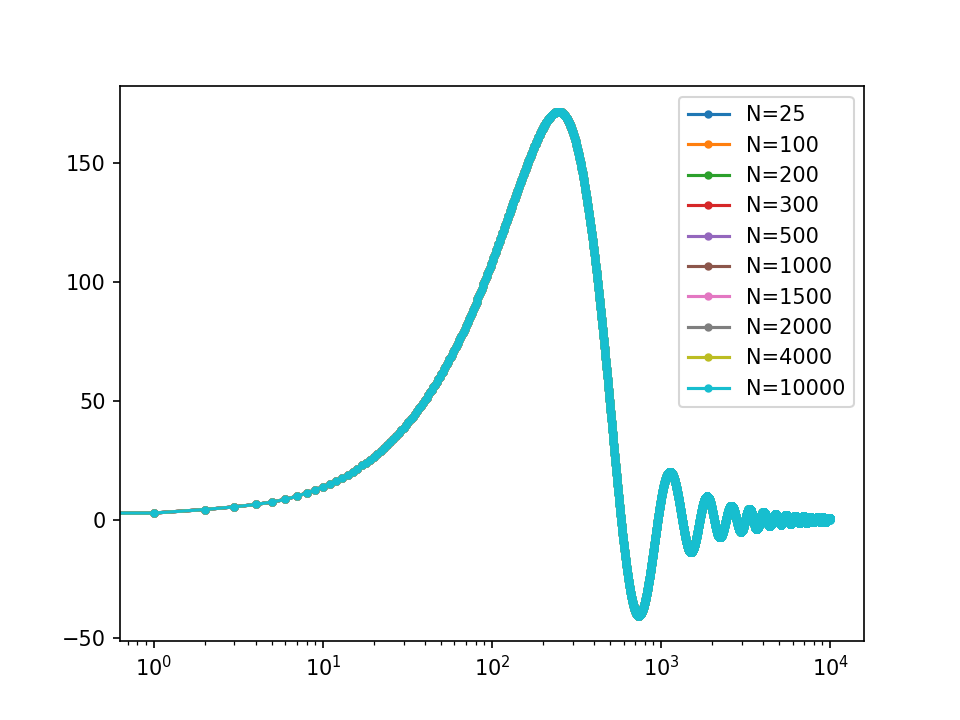

25 15.7127575
100 55.80606821052632
200 96.18957094736841
300 120.42264729824562
500 121.26792585263158
1000 53.97171449778947
1500 38.99182886680702
2000 28.617675617842103
4000 14.183813206952632
10000 5.707136145574494


In [466]:
plt.figure()
for pm in pmom:
    plt.plot(pm,'.-',label='N={}'.format(len(pm)))
    print len(pm),np.nanmean(pm[:int(len(pm)*-0.05)])
    plt.xscale('log')
    plt.legend()

In [467]:
int(len(pm)*-0.1)

-1000

#### Rebuild the phase for testing

In [468]:
phase = []
for pm in pmom[0:]:
    with open(frtm+'pmom_input/pmom_temp.dat','w') as f:
        [f.write('{}\n'.format(mom/(2*im+1))) for im,mom in enumerate(pm)]
    phase_tmp = subprocess.check_output([fp_lib+'bin/phase','-c','-d','-s','0.5','-n','-f',
                                 frtm+'pmom_input/pmom_temp.dat'])
    phase.append(np.array(phase_tmp.split()))
phase = [ph.reshape(len(phase[0])/3,3).astype(np.float) for ph in phase]

In [469]:
len(phase)

10

In [470]:
nw = 4
nr = 39
mi['reff'][nr], mi['wavelen'][nw]

(20.0, 0.354)

<IPython.core.display.Javascript object>


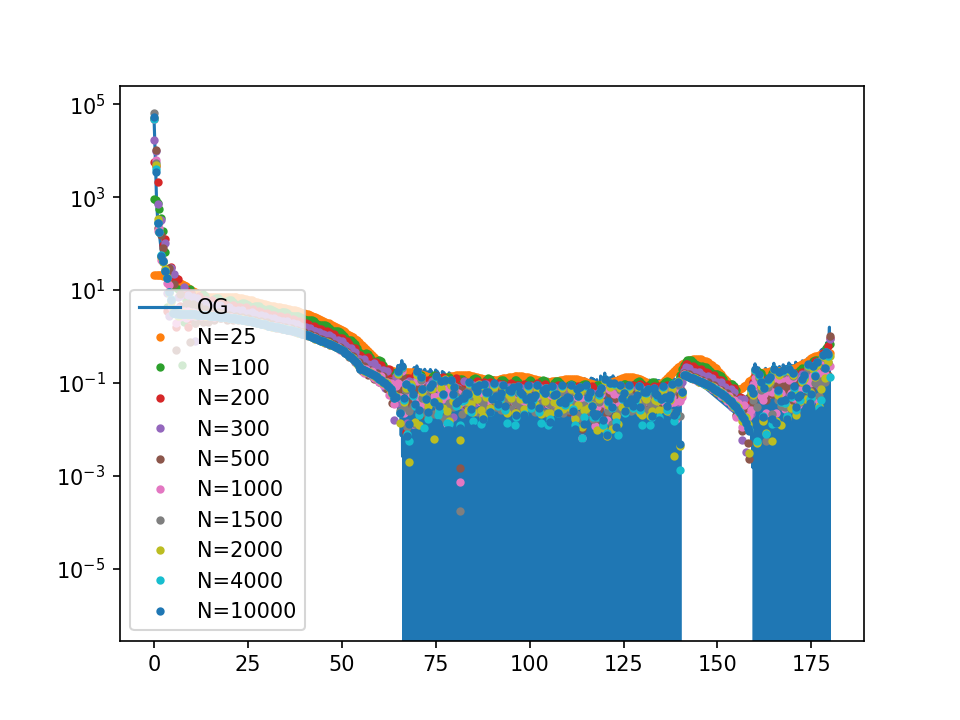

361 361
359 361
357 361
355 361
353 361
359 361
360 361
359 361
361 361
360 361


In [471]:
plt.figure()
plt.plot(mi['theta'][nw,nr,0,:].compressed(),mi['phase'][nw,nr,0,:].compressed(),'-',label='OG')
for i,ph in enumerate(phase):
    plt.plot(ph[:,0],ph[:,1],'.',label='N={}'.format(len(pmom[i])))
    print len(ph[ph[:,1]>0,1]),len(ph[:,1])
plt.legend()
plt.yscale('log')

### Build the functions to quantify the pmoms

In [ ]:
frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r)

In [473]:
def calc_pmom(file_in,nleg):
    'Calculate the pmom, as a wrapper to libradtran pmom, file_in is the phase function file'
    pmoms_tmp = subprocess.check_output([fp_lib+'bin/pmom','-l','{}'.format(nleg),'-n','-c',file_in])
    return np.array([float(k) for k in  pmoms_tmp.split()]) 

In [474]:
fp_rtm = getpath('rtm')

Return path named:  rtm /scratch/rtm/


In [539]:
def calc_phase(pmom):
    'Calculate the phase function, uses coefficients as input (same needed for libradtran)'
    with open(fp_rtm+'pmom_input/pmom_temp.dat','w') as f:
        [f.write('{}\n'.format(mom/(2*im+1))) for im,mom in enumerate(pmom)]
    phase_tmp = subprocess.check_output([fp_lib+'bin/phase','-c','-d','-s','0.5','-n','-f',
                                         fp_rtm+'pmom_input/pmom_temp.dat'])
    ph = np.array(phase_tmp.split())
    return ph.reshape(len(ph)/3,3).astype(np.float)

In [493]:
pha = np.array([[-1,-1],[-1,-1]])
i = 0
max_iter = 20
while any(pha[:,1]<0):
    i = i+1
    nleg = 2*nleg
    if i>max_iter: 
        print '** did not converge for'
        break

 ** did not converge for


In [561]:
mi['reff'][29]

15.0

In [560]:
mi['wavelen'][50]

0.4

In [559]:
max_nmom = 9000
pbar = tqdm(total=len(mi['wavelen'])*len(mi['reff']))
pmoms = np.ma.masked_array(np.zeros((len(mi['wavelen']),len(mi['reff']),max_nmom)),mask=True)
for nw, w in enumerate(mi['wavelen']):
    for nr,r in enumerate(mi['reff']):
        nleg = mi['ntheta'][nw,nr,0]
        if (nleg<1500) & (mi['nmom'][nw,nr,0] <1000):
            pbar.update()
            continue
        pha = np.array([[-1,-1],[-1,-1]])
        while any(pha[:,1]<0):
            pmom_tmp = calc_pmom(frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r),nleg)
            pha = calc_phase(pmom_tmp)
            nleg = int(2*nleg)
            if nleg>max_nmom: 
                print '** did not converge for nw:{}, nr:{}, nleg:{}'.format(nw,nr,nleg)
                break
        pmoms[nw,nr,:len(pmom_tmp)] = pmom_tmp 
        pbar.update()

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


A Jupyter Widget

** did not converge for nw:0, nr:25, nleg:10000
** did not converge for nw:0, nr:26, nleg:12000
** did not converge for nw:0, nr:27, nleg:12000
** did not converge for nw:0, nr:28, nleg:12000
** did not converge for nw:0, nr:29, nleg:12000
** did not converge for nw:0, nr:30, nleg:12000
** did not converge for nw:0, nr:31, nleg:12000
** did not converge for nw:0, nr:32, nleg:12000
** did not converge for nw:0, nr:33, nleg:12000
** did not converge for nw:0, nr:34, nleg:12000
** did not converge for nw:0, nr:35, nleg:12000
** did not converge for nw:0, nr:36, nleg:12000
** did not converge for nw:0, nr:37, nleg:12000
** did not converge for nw:0, nr:38, nleg:12000
** did not converge for nw:0, nr:39, nleg:12000
** did not converge for nw:1, nr:26, nleg:12000
** did not converge for nw:1, nr:27, nleg:12000
** did not converge for nw:1, nr:28, nleg:12000
** did not converge for nw:1, nr:29, nleg:12000
** did not converge for nw:1, nr:30, nleg:12000
** did not converge for nw:1, nr:31, nle

** did not converge for nw:12, nr:33, nleg:12000
** did not converge for nw:12, nr:34, nleg:12000
** did not converge for nw:12, nr:35, nleg:12000
** did not converge for nw:12, nr:36, nleg:12000
** did not converge for nw:12, nr:37, nleg:12000
** did not converge for nw:12, nr:38, nleg:12000
** did not converge for nw:12, nr:39, nleg:12000
** did not converge for nw:13, nr:26, nleg:10048
** did not converge for nw:13, nr:27, nleg:12000
** did not converge for nw:13, nr:28, nleg:12000
** did not converge for nw:13, nr:29, nleg:12000
** did not converge for nw:13, nr:30, nleg:12000
** did not converge for nw:13, nr:31, nleg:12000
** did not converge for nw:13, nr:32, nleg:12000
** did not converge for nw:13, nr:33, nleg:12000
** did not converge for nw:13, nr:34, nleg:12000
** did not converge for nw:13, nr:35, nleg:12000
** did not converge for nw:13, nr:36, nleg:12000
** did not converge for nw:13, nr:38, nleg:12000
** did not converge for nw:14, nr:27, nleg:12000
** did not converge 

** did not converge for nw:25, nr:36, nleg:12000
** did not converge for nw:25, nr:37, nleg:12000
** did not converge for nw:25, nr:38, nleg:12000
** did not converge for nw:25, nr:39, nleg:12000
** did not converge for nw:26, nr:27, nleg:10264
** did not converge for nw:26, nr:28, nleg:12000
** did not converge for nw:26, nr:29, nleg:12000
** did not converge for nw:26, nr:30, nleg:12000
** did not converge for nw:26, nr:31, nleg:12000
** did not converge for nw:26, nr:32, nleg:12000
** did not converge for nw:26, nr:33, nleg:12000
** did not converge for nw:26, nr:34, nleg:12000
** did not converge for nw:26, nr:35, nleg:12000
** did not converge for nw:26, nr:36, nleg:12000
** did not converge for nw:26, nr:37, nleg:12000
** did not converge for nw:26, nr:38, nleg:12000
** did not converge for nw:26, nr:39, nleg:12000
** did not converge for nw:27, nr:27, nleg:10112
** did not converge for nw:27, nr:28, nleg:12000
** did not converge for nw:27, nr:29, nleg:12000
** did not converge 

** did not converge for nw:39, nr:35, nleg:12000
** did not converge for nw:39, nr:36, nleg:12000
** did not converge for nw:39, nr:37, nleg:12000
** did not converge for nw:39, nr:38, nleg:12000
** did not converge for nw:39, nr:39, nleg:12000
** did not converge for nw:40, nr:28, nleg:10248
** did not converge for nw:40, nr:29, nleg:12000
** did not converge for nw:40, nr:30, nleg:12000
** did not converge for nw:40, nr:31, nleg:12000
** did not converge for nw:40, nr:32, nleg:12000
** did not converge for nw:40, nr:33, nleg:12000
** did not converge for nw:40, nr:34, nleg:12000
** did not converge for nw:40, nr:35, nleg:12000
** did not converge for nw:40, nr:36, nleg:12000
** did not converge for nw:40, nr:37, nleg:12000
** did not converge for nw:40, nr:38, nleg:12000
** did not converge for nw:40, nr:39, nleg:12000
** did not converge for nw:41, nr:28, nleg:10048
** did not converge for nw:41, nr:29, nleg:12000
** did not converge for nw:41, nr:30, nleg:12000
** did not converge 

** did not converge for nw:54, nr:37, nleg:12000
** did not converge for nw:54, nr:38, nleg:12000
** did not converge for nw:54, nr:39, nleg:12000
** did not converge for nw:55, nr:30, nleg:12000
** did not converge for nw:55, nr:32, nleg:12000
** did not converge for nw:55, nr:33, nleg:12000
** did not converge for nw:55, nr:34, nleg:12000
** did not converge for nw:55, nr:35, nleg:12000
** did not converge for nw:55, nr:36, nleg:12000
** did not converge for nw:55, nr:37, nleg:12000
** did not converge for nw:55, nr:38, nleg:12000
** did not converge for nw:55, nr:39, nleg:12000
** did not converge for nw:56, nr:30, nleg:12000
** did not converge for nw:56, nr:31, nleg:12000
** did not converge for nw:56, nr:32, nleg:12000
** did not converge for nw:56, nr:33, nleg:12000
** did not converge for nw:56, nr:34, nleg:12000
** did not converge for nw:56, nr:35, nleg:12000
** did not converge for nw:56, nr:36, nleg:12000
** did not converge for nw:56, nr:37, nleg:12000
** did not converge 

** did not converge for nw:72, nr:31, nleg:11936
** did not converge for nw:72, nr:32, nleg:12000
** did not converge for nw:72, nr:33, nleg:12000
** did not converge for nw:72, nr:34, nleg:12000
** did not converge for nw:72, nr:35, nleg:12000
** did not converge for nw:72, nr:36, nleg:12000
** did not converge for nw:72, nr:37, nleg:12000
** did not converge for nw:72, nr:38, nleg:12000
** did not converge for nw:72, nr:39, nleg:12000
** did not converge for nw:73, nr:31, nleg:11840
** did not converge for nw:73, nr:32, nleg:12000
** did not converge for nw:73, nr:33, nleg:12000
** did not converge for nw:73, nr:34, nleg:12000
** did not converge for nw:73, nr:35, nleg:12000
** did not converge for nw:73, nr:36, nleg:12000
** did not converge for nw:73, nr:37, nleg:12000
** did not converge for nw:73, nr:38, nleg:12000
** did not converge for nw:73, nr:39, nleg:12000
** did not converge for nw:74, nr:31, nleg:11608
** did not converge for nw:74, nr:32, nleg:12000
** did not converge 

** did not converge for nw:92, nr:33, nleg:12000
** did not converge for nw:92, nr:34, nleg:12000
** did not converge for nw:92, nr:35, nleg:12000
** did not converge for nw:92, nr:36, nleg:12000
** did not converge for nw:92, nr:37, nleg:12000
** did not converge for nw:92, nr:38, nleg:12000
** did not converge for nw:92, nr:39, nleg:12000
** did not converge for nw:93, nr:32, nleg:10400
** did not converge for nw:93, nr:33, nleg:12000
** did not converge for nw:93, nr:35, nleg:12000
** did not converge for nw:93, nr:36, nleg:12000
** did not converge for nw:93, nr:37, nleg:12000
** did not converge for nw:93, nr:38, nleg:12000
** did not converge for nw:93, nr:39, nleg:12000
** did not converge for nw:94, nr:32, nleg:10304
** did not converge for nw:94, nr:33, nleg:12000
** did not converge for nw:94, nr:34, nleg:12000
** did not converge for nw:94, nr:35, nleg:12000
** did not converge for nw:94, nr:36, nleg:12000
** did not converge for nw:94, nr:37, nleg:12000
** did not converge 

** did not converge for nw:116, nr:37, nleg:12000
** did not converge for nw:116, nr:38, nleg:12000
** did not converge for nw:116, nr:39, nleg:12000
** did not converge for nw:117, nr:34, nleg:10976
** did not converge for nw:117, nr:35, nleg:12000
** did not converge for nw:117, nr:37, nleg:12000
** did not converge for nw:117, nr:38, nleg:12000
** did not converge for nw:117, nr:39, nleg:12000
** did not converge for nw:118, nr:34, nleg:10832
** did not converge for nw:118, nr:35, nleg:12000
** did not converge for nw:118, nr:37, nleg:12000
** did not converge for nw:118, nr:38, nleg:12000
** did not converge for nw:118, nr:39, nleg:12000
** did not converge for nw:119, nr:34, nleg:10688
** did not converge for nw:119, nr:35, nleg:12000
** did not converge for nw:119, nr:36, nleg:12000
** did not converge for nw:119, nr:37, nleg:12000
** did not converge for nw:119, nr:38, nleg:12000
** did not converge for nw:119, nr:39, nleg:12000
** did not converge for nw:120, nr:34, nleg:10496


** did not converge for nw:152, nr:37, nleg:12000
** did not converge for nw:152, nr:38, nleg:12000
** did not converge for nw:153, nr:37, nleg:11728
** did not converge for nw:153, nr:38, nleg:12000
** did not converge for nw:154, nr:37, nleg:11712
** did not converge for nw:154, nr:38, nleg:12000
** did not converge for nw:155, nr:37, nleg:11544
** did not converge for nw:155, nr:38, nleg:12000
** did not converge for nw:156, nr:37, nleg:11368
** did not converge for nw:156, nr:38, nleg:12000
** did not converge for nw:157, nr:37, nleg:11184
** did not converge for nw:157, nr:38, nleg:12000
** did not converge for nw:157, nr:39, nleg:12000
** did not converge for nw:158, nr:37, nleg:10984
** did not converge for nw:158, nr:38, nleg:12000
** did not converge for nw:158, nr:39, nleg:12000
** did not converge for nw:159, nr:37, nleg:10808
** did not converge for nw:159, nr:38, nleg:12000
** did not converge for nw:159, nr:39, nleg:12000
** did not converge for nw:160, nr:37, nleg:10640


In [565]:
for nw, w in enumerate(mi['wavelen']):
    for nr,r in enumerate(mi['reff']):
        nleg = mi['ntheta'][nw,nr,0]
        if (nleg<1500) & (mi['nmom'][nw,nr,0] <1000):
            pmoms[nw,nr,:mi['nmom'][nw,nr,0]+1] = mi['pmom'][nw,nr,0,:].compressed()

### Load from the Hu 
/data/sam/libradtran/ice  

./hu_v3 /home/sam/rtm/pmom_input/phase_run2020112_SL_w0.354_r01.0.dat ./a.dat 2902

 As test case

In [281]:
with open('/data/sam/libradtran/ice/a.dat') as f:
    hus = f.read()
hu = np.array(hus.split()).astype(np.float)

In [282]:
hu

array([ 1.00000000e+00,  7.78714001e-01,  7.00180054e-01,  5.54081678e-01,
        4.99844164e-01,  4.39086944e-01,  4.04703200e-01,  3.74926209e-01,
        3.50357711e-01,  3.26500356e-01,  3.09270293e-01,  2.86850184e-01,
        2.71988750e-01,  2.52220511e-01,  2.37115771e-01,  2.20426902e-01,
        2.04842612e-01,  1.90530583e-01,  1.75235286e-01,  1.62555307e-01,
        1.48308843e-01,  1.36809960e-01,  1.23970881e-01,  1.13523804e-01,
        1.02276973e-01,  9.28547457e-02,  8.32040161e-02,  7.47668073e-02,
        6.66673854e-02,  5.92268780e-02,  5.25742173e-02,  4.60700206e-02,
        4.06705625e-02,  3.51144411e-02,  3.07979621e-02,  2.61133723e-02,
        2.27131844e-02,  1.88007113e-02,  1.61703434e-02,  1.29926344e-02,
        1.09715071e-02,  8.45112279e-03,  6.92575937e-03,  4.94240923e-03,
        3.79801495e-03,  2.24661548e-03,  1.37158227e-03,  1.82569202e-04,
       -4.57100745e-04, -1.34544971e-03, -1.78497448e-03, -2.45482009e-03,
       -2.75627151e-03, -

<IPython.core.display.Javascript object>


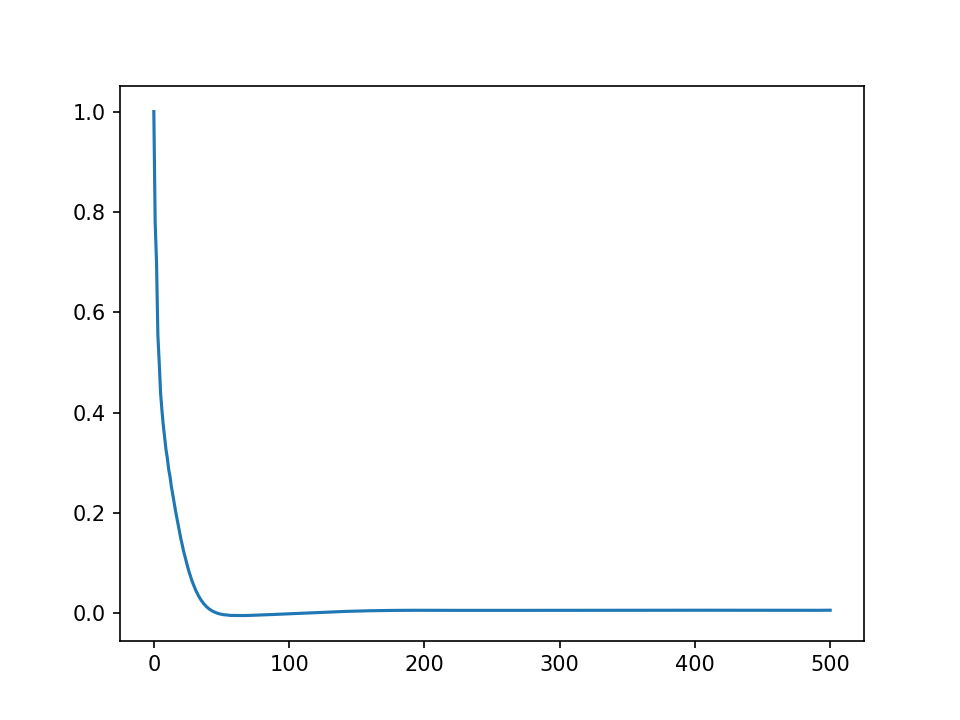

In [283]:
plt.figure()
plt.plot(hu)

In [284]:
with open(frtm+'pmom_input/pmom_temp.dat','w') as f:
    [f.write('{}\n'.format(mom)) for mom in hu]
phase_tmp = subprocess.check_output([fp_lib+'bin/phase','-c','-d','-n','-f',
                             frtm+'pmom_input/pmom_temp.dat'])
phasehu = np.array(phase_tmp.split())
phasehu = phasehu.reshape(len(phasehu)/3,3).astype(np.float)

In [285]:
mi['reff'][1]

1.0

<IPython.core.display.Javascript object>


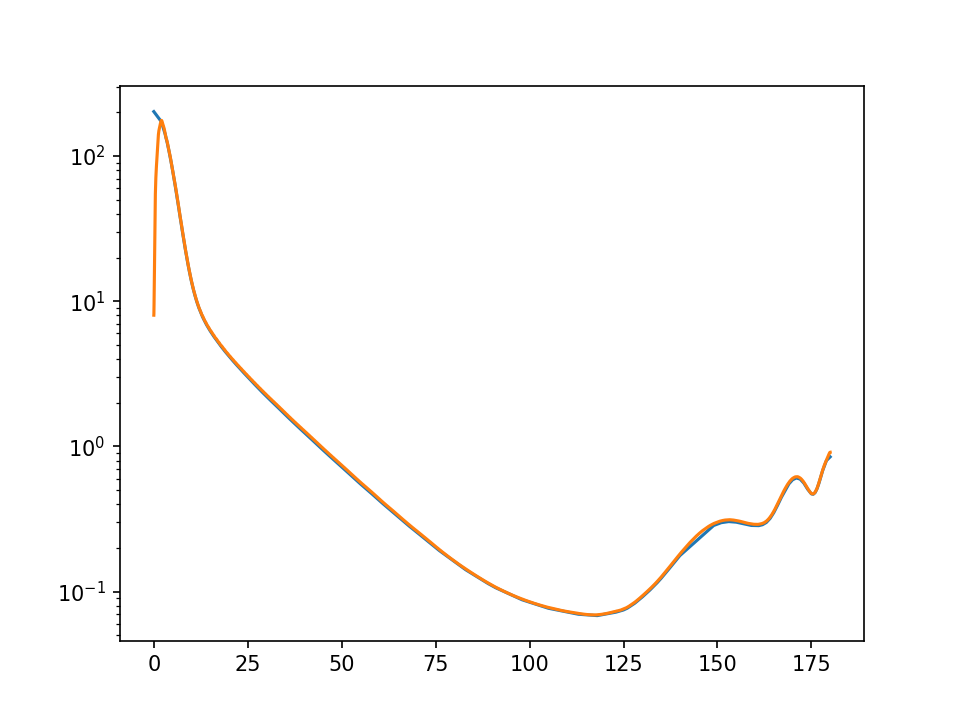

In [342]:
plt.figure()
nw = 4
nr = 1
plt.plot(mi['theta'][nw,nr,0,:].compressed(),mi['phase'][nw,nr,0,:].compressed(),'-',label='OG')
plt.plot(phasehu[:,0],phasehu[:,1],'-')
plt.yscale('log')

! Match!

### Calculate the pmom using the Hu delta-m

In [297]:
fp_hu = '/data/sam/libradtran/ice'

In [312]:
w = 0.354
r = 7.5
pmom = []
for nleg in [25,100,200,500,1000,2500]:
    print nleg
    pmoms_tmp = subprocess.check_output([fp_hu+'/hu_v3',
                                         frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r),
                                         './dummy.dat','{}'.format(nleg)])
    pmom.append(np.array([float(k) for k in  pmoms_tmp.split()]))      

25
100
200
500
1000
2500


In [343]:
frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r)

u'/home/sam/rtm/pmom_input/phase_run2020112_SL_w0.354_r07.5.dat'

In [316]:
nleg = 3000
pmoms_tmp = subprocess.check_output([fp_hu+'/hu_v3',
                                         frtm+'pmom_input/phase_{vv}_w{w:01.3f}_r{r:04.1f}.dat'.format(vv=vv,w=w,r=r),
                                         './dummy.dat','{}'.format(nleg),'0'],stderr=subprocess.STDOUT)
print pmoms_tmp

PAUSE no convergence in svdcmp
To resume execution, type go.  Other input will terminate the job.
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG



In [303]:
pmom

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64)]

In [299]:
phase = []
for pm in pmom:
    with open(frtm+'pmom_input/pmom_temp.dat','w') as f:
        [f.write('{}\n'.format(mom)) for mom in pm]
    phase_tmp = subprocess.check_output([fp_lib+'bin/phase','-c','-d','-n','-f',
                                 frtm+'pmom_input/pmom_temp.dat'])
    phase.append(np.array(phase_tmp.split()))
phase = [ph.reshape(len(phase[0])/3,3).astype(np.float) for ph in phase]

CalledProcessError: Command '[u'/home/sam/libradtran/libRadtran-2.0.2/bin/phase', '-c', '-d', '-n', '-f', u'/home/sam/rtm/pmom_input/pmom_temp.dat']' returned non-zero exit status 253

### Pull out the pmom from mie

In [319]:
mi['pmom'][nw,nr,0,:].compressed()

array([1.0000000e+00, 2.3451982e+00, 3.5209248e+00, 3.9252124e+00,
       4.5661635e+00, 4.9171629e+00, 5.3659816e+00, 5.7416515e+00,
       6.0912137e+00, 6.3520904e+00, 6.6577473e+00, 6.7766695e+00,
       6.9925694e+00, 7.0194702e+00, 7.1009021e+00, 7.0726318e+00,
       7.0154719e+00, 6.9377646e+00, 6.7707634e+00, 6.6393394e+00,
       6.3964949e+00, 6.2120695e+00, 5.9237962e+00, 5.6937861e+00,
       5.3843451e+00, 5.1204424e+00, 4.8088484e+00, 4.5238132e+00,
       4.2247562e+00, 3.9305601e+00, 3.6543410e+00, 3.3622901e+00,
       3.1137145e+00, 2.8342929e+00, 2.6162584e+00, 2.3557839e+00,
       2.1685929e+00, 1.9302832e+00, 1.7738186e+00, 1.5643835e+00,
       1.4337693e+00, 1.2554544e+00, 1.1490501e+00, 9.9788469e-01,
       9.1195554e-01, 7.8571224e-01, 7.1487463e-01, 6.0901755e-01,
       5.5215073e-01, 4.6994483e-01, 4.2773306e-01, 3.5774606e-01,
       3.2357723e-01, 2.7064306e-01, 2.4749582e-01, 2.0333819e-01,
       1.8575668e-01, 1.4999776e-01, 1.3761550e-01, 1.1038998e

In [362]:
nw = 1250
nr = 1

In [462]:
phase = []
with open(frtm+'pmom_input/pmom_temp.dat','w') as f:
    [f.write('{}\n'.format(mom/(2*im+1))) for im,mom in enumerate(mi['pmom'][nw,nr,0,:].compressed())]
phase_tmp = subprocess.check_output([fp_lib+'bin/phase','-c','-d','-s','0.1',
                             frtm+'pmom_input/pmom_temp.dat'])
phase.append(np.array(phase_tmp.split()))
phase = [ph.reshape(len(ph)/3,3).astype(np.float) for ph in phase]

<IPython.core.display.Javascript object>


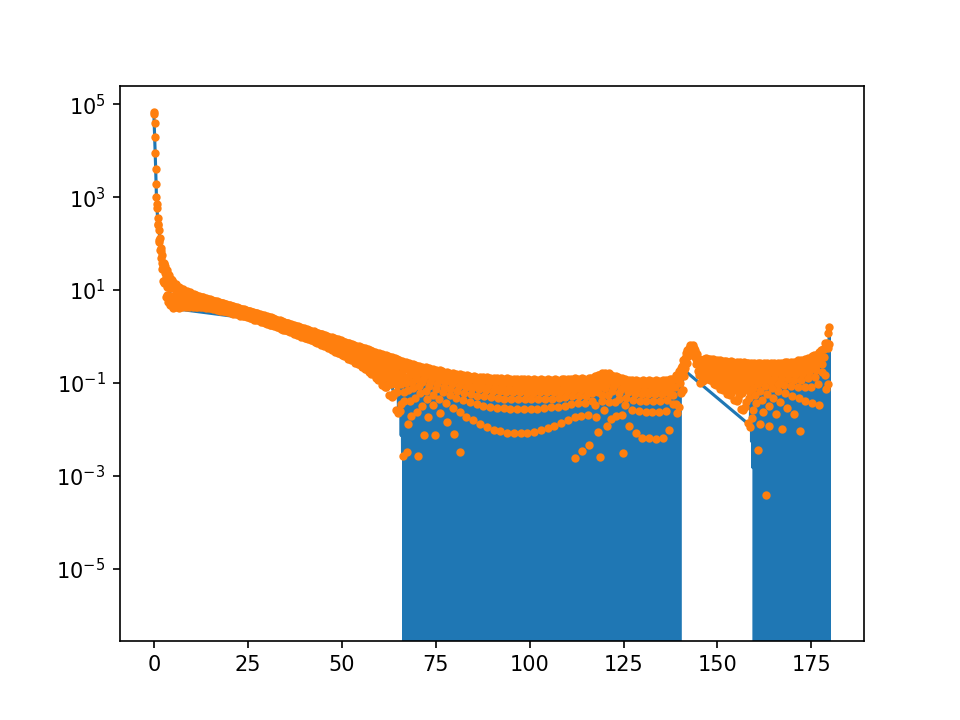

In [463]:
plt.figure()
nw = 4
nr = 39
plt.plot(mi['theta'][nw,nr,0,:].compressed(),mi['phase'][nw,nr,0,:].compressed(),'-',label='OG')
plt.plot(phase[0][:,0],phase[0][:,1],'.')
plt.yscale('log')

## Load longer calcs

In [567]:
vv = 'run2020115_largeonly_SL'

In [568]:
mi2,mi2_dict = lu.load_netcdf(frtm+'mie_wc_{}mie.cdf'.format(vv),everything=True)

Reading file: /home/sam/rtm/mie_wc_run2020115_largeonly_SLmie.cdf
Outputting the Data subdatasets:
0: wavelen
1: reff
2: ntheta
3: theta
4: phase
5: nmom
6: pmom
7: ext
8: ssa
9: gg
10: refre
11: refim
12: rho
['ntheta', 'pmom', 'nmom', 'refre', 'wavelen', 'gg', 'ext', 'refim', 'rho', 'phase', 'theta', 'ssa', 'reff']


In [569]:
mi2['nmom'].shape

(201, 11, 1)

In [570]:
mi2['wavelen']

masked_array(data=[0.35 , 0.351, 0.352, 0.353, 0.354, 0.355, 0.356, 0.357,
                   0.358, 0.359, 0.36 , 0.361, 0.362, 0.363, 0.364, 0.365,
                   0.366, 0.367, 0.368, 0.369, 0.37 , 0.371, 0.372, 0.373,
                   0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.38 , 0.381,
                   0.382, 0.383, 0.384, 0.385, 0.386, 0.387, 0.388, 0.389,
                   0.39 , 0.391, 0.392, 0.393, 0.394, 0.395, 0.396, 0.397,
                   0.398, 0.399, 0.4  , 0.401, 0.402, 0.403, 0.404, 0.405,
                   0.406, 0.407, 0.408, 0.409, 0.41 , 0.411, 0.412, 0.413,
                   0.414, 0.415, 0.416, 0.417, 0.418, 0.419, 0.42 , 0.421,
                   0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428, 0.429,
                   0.43 , 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437,
                   0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444, 0.445,
                   0.446, 0.447, 0.448, 0.449, 0.45 , 0.451, 0.452, 0.453,
                   0.454,

In [571]:
mi2['reff']

masked_array(data=[15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. ,
                   19.5, 20. ],
             mask=False,
       fill_value=1e+20)

In [578]:
mi2['ntheta'][50,:,0]

masked_array(data=[1362, 1726, 2292, 2500, 2500, 2500, 2500, 2500, 2500,
                   2500, 2500],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [579]:
mi2['nmom'][50,:,0]

masked_array(data=[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
                   1000, 1000],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [581]:
pmoms.shape

(1351, 40, 9000)

In [586]:
pmoms[0,39,:]

masked_array(data=[1.0, 2.72512, 4.24356, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=1e+20)

In [589]:
for i in xrange(40):
    print i,len(pmoms[0,i,:].compressed()),len(mi['phase'][0,i,:].compressed())

0 56 72
1 113 91
2 170 100
3 228 117
4 286 127
5 346 138
6 405 142
7 465 158
8 525 172
9 585 187
10 645 207
11 706 215
12 767 216
13 828 228
14 889 241
15 950 237
16 235 235
17 239 239
18 241 241
19 246 246
20 490 245
21 538 269
22 353 353
23 533 533
24 806 806
25 5000 1250
26 6000 1500
27 6000 1500
28 6000 1500
29 6000 1500
30 6000 1500
31 6000 1500
32 6000 1500
33 6000 1500
34 6000 1500
35 6000 1500
36 6000 1500
37 6000 1500
38 6000 1500
39 6000 1500


In [603]:
pha2 = calc_phase(pmoms[0,31,:])

<IPython.core.display.Javascript object>


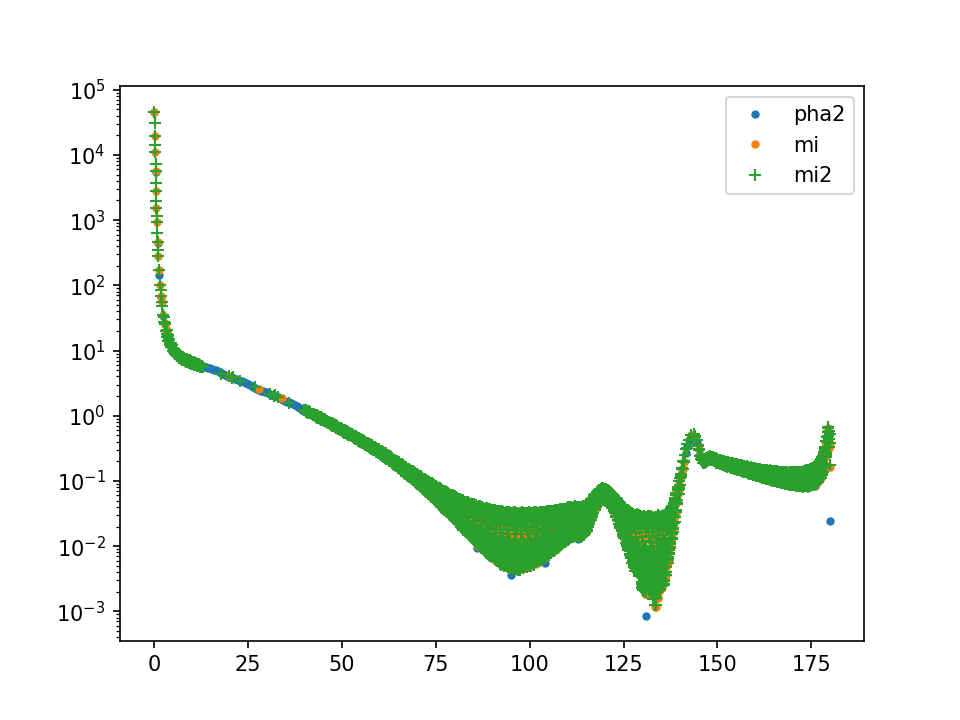

In [606]:
plt.figure()
plt.plot(pha2[:,0],pha2[:,1],'.',label='pha2')
plt.plot(mi['theta'][0,31,0,:],mi['phase'][0,31,0,:],'.',label='mi')
plt.plot(mi2['theta'][0,2,0,:],mi2['phase'][0,2,0,:],'+',label='mi2')

plt.legend()
plt.yscale('log')

In [601]:
mi['reff'][31]

16.0

In [602]:
mi2['reff'][2]

16.0

In [607]:
mi['pmom'] = pmoms

In [608]:
mi.keys()

['ntheta',
 'pmom',
 'nmom',
 'refre',
 'wavelen',
 'gg',
 'ext',
 'refim',
 'rho',
 'phase',
 'theta',
 'ssa',
 'reff']

In [609]:
mi['pmom'].shape

(1351, 40, 9000)

In [610]:
frtm

u'/home/sam/rtm/'

## Check and save to file

In [637]:
for nw,w in enumerate(mi['wavelen']):
    for nr,r in enumerate(mi['reff']):
        mi['nmom'][nw,nr,0] = len(mi['pmom'][nw,nr,:].compressed())

In [688]:
mii = {}
for k in mi.keys():
    mii[k] = mi[k].data
    print k, mi[k].shape

ntheta (1351, 40, 1)
pmom (1351, 40, 9000)
nmom (1351, 40, 1)
refre (1351,)
wavelen (1351,)
gg (1351, 40)
ext (1351, 40)
refim (1351,)
rho (1351, 40)
phase (1351, 40, 1, 1500)
theta (1351, 40, 1, 1500)
ssa (1351, 40)
reff (40,)


In [692]:
sio.savemat(frtm+'dat/mie_{}.mat'.format(vv),mii)

In [667]:
frtm+'dat/mie_{}.mat'.format(vv)

u'/home/sam/rtm/dat/mie_run2020112_SL.mat'

In [638]:
for k in mi.keys():
    print k, mi[k].shape

ntheta (1351, 40, 1)
pmom (1351, 40, 9000)
nmom (1351, 40, 1)
refre (1351,)
wavelen (1351,)
gg (1351, 40)
ext (1351, 40)
refim (1351,)
rho (1351, 40)
phase (1351, 40, 1, 1500)
theta (1351, 40, 1, 1500)
ssa (1351, 40)
reff (40,)


In [693]:
reload(ru)

<module 'Run_libradtran' from 'Run_libradtran.pyc'>

In [694]:
import Run_libradtran as ru
pmom = ru.make_pmom_inputs(fp_rtm=frtm+'dat/',new=True)

In [695]:
for k in pmom.keys():
    try:
        print k, pmom[k].shape
    except:
        pass

ntheta (40, 1351)
wvl (1351,)
nim (1351,)
file_name nre (1351,)
rho (40, 1351)
phase (40, 1351, 1500)
ssa (40, 1351)
pmom (40, 1351, 9000)
nmom (40, 1351)
ext (40, 1351)
theta (40, 1351, 1500)
ref (1, 40)


In [696]:
pmom['pmom'][20,140,:20]

array([ 1.        ,  2.59243155,  3.96610999,  4.70756912,  5.39468718,
        6.1159811 ,  6.7504487 ,  7.62308311,  8.38759995,  9.20701694,
       10.13299274, 10.87232971, 11.83388329, 12.63477802, 13.45752048,
       14.38097572, 15.11550999, 15.98797226, 16.82841873, 17.53478813])

In [697]:
mi['pmom'].shape

(1351, 40, 9000)

In [698]:
mi['pmom'][140,20,:20]

masked_array(data=[1.0, 2.5924315452575684, 3.9661099910736084,
                   4.707569122314453, 5.394687175750732,
                   6.115981101989746, 6.750448703765869,
                   7.623083114624023, 8.38759994506836, 9.207016944885254,
                   10.1329927444458, 10.872329711914062,
                   11.833883285522461, 12.634778022766113,
                   13.457520484924316, 14.380975723266602,
                   15.115509986877441, 15.987972259521484,
                   16.828418731689453, 17.534788131713867],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [699]:
ppm = mi['pmom']

In [700]:
ppo = np.swapaxes(ppm,0,1)

In [701]:
ppo[20,140,:20]

masked_array(data=[1.0, 2.5924315452575684, 3.9661099910736084,
                   4.707569122314453, 5.394687175750732,
                   6.115981101989746, 6.750448703765869,
                   7.623083114624023, 8.38759994506836, 9.207016944885254,
                   10.1329927444458, 10.872329711914062,
                   11.833883285522461, 12.634778022766113,
                   13.457520484924316, 14.380975723266602,
                   15.115509986877441, 15.987972259521484,
                   16.828418731689453, 17.534788131713867],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

# Now plot the phase functions and legendre polynomials

In [46]:
nn = m['ntheta'][25,200]

<IPython.core.display.Javascript object>


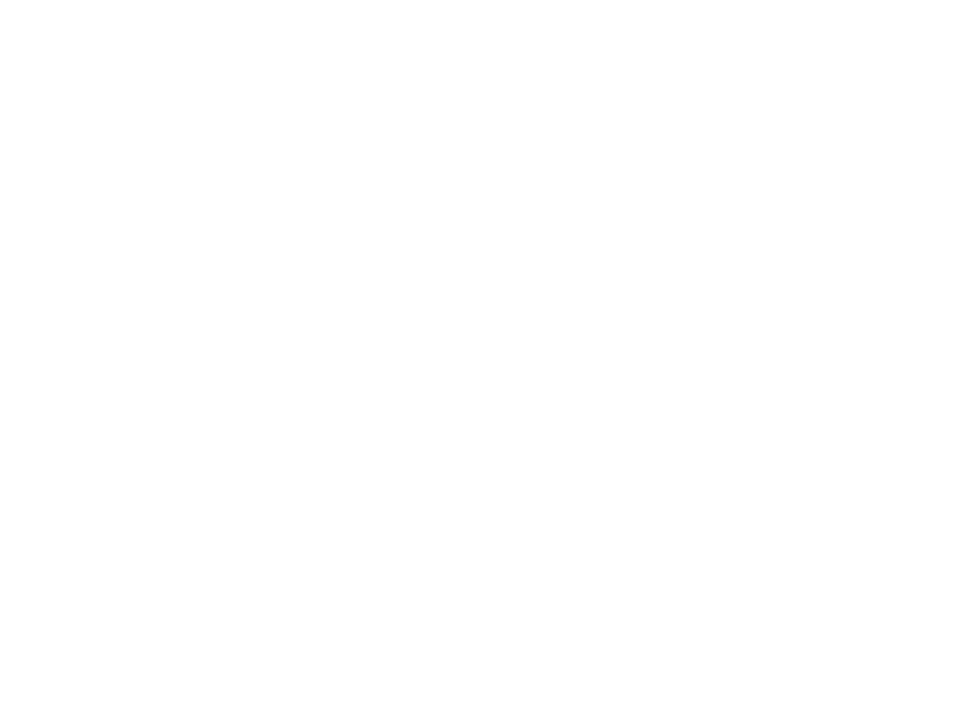

NameError: name 'm' is not defined

In [344]:
plt.figure()
plt.plot(m['theta'][25,200,:],m['phase'][25,200,:],label='Original Mie phase function')
plt.plot(phase[:,0],phase[:,1],'-',label='After reconstitution from scaled legendre polynomial')
plt.gca().set_yscale('log')
plt.ylabel('Phase function')
plt.xlabel('Scattering Angle')
plt.xlim(0,180)
plt.legend(frameon=False)

# Create a loop routine to build the legendre phase functions 

In [54]:
m['ntheta'].shape

(30, 754)

In [55]:
m['ref'].shape

(30,)

In [56]:
m['wvl'].shape

(754,)

In [59]:
import subprocess

In [92]:
fdelta = fp+'ice/deltam3'

In [62]:
m['pmom'].shape

(30, 754, 3250)

In [63]:
m['nmom'].shape

(30, 754)

In [98]:
m['pmom_delta'] = np.zeros((len(m['ref']),len(m['wvl']),301))
m['nmom_delta'] = np.zeros_like(m['nmom'])

In [101]:
for i,r in enumerate(m['ref']):
    for j,w in enumerate(m['wvl']):
        
        fname_in = fp+'input/phase/mie_r{:02.1f}_w{:04.0f}.in'.format(r,w*1000.0)
        fname_out = fp+'output/phase/mie_r{:02.1f}_w{:04.0f}.out'.format(r,w*1000.0)
        
        with open(fname_in,'w') as f:
            f.write('{:4.0f}\n'.format(m['ntheta'][i,j]))
            for ii in xrange(m['ntheta'][i,j],0,-1):
                f.write('{} {}\n'.format(m['theta'][i,j,ii-1],m['phase'][i,j,ii-1]))
        
        nx = int(2.0*np.pi*r/(w*1000.0)*1000.0)
        if nx<26: nx =26
        if nx>300: nx=300
        
        m['nmom_delta'][i,j] = nx
        
        print fname_in, nx
        subprocess.call([fdelta,fname_in,fname_out,'{}'.format(nx)])
        pmom = np.genfromtxt(fname_out)
        m['pmom_delta'][i,j,:nx+1] = pmom
        
    sio.savemat(fs+'rtm_dat/mie_hi_delta.mat',m)

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0400.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0402.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0404.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0406.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0408.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0410.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0412.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0414.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0416.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0418.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0420.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0422.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0424.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0624.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0626.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0628.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0630.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0632.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0634.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0636.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0638.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0640.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0642.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0644.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0646.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0648.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0848.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0850.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0852.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0854.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0856.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0858.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0860.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0862.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0864.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0866.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0868.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0870.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w0872.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1066.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1068.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1070.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1072.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1074.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1076.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1078.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1080.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1082.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1084.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1086.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1088.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1090.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1288.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1290.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1292.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1294.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1296.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1298.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1300.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1302.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1304.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1306.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1308.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1310.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1312.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1510.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1512.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1514.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1516.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1518.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1520.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1522.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1524.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1526.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1528.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1530.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1532.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1534.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1730.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1732.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1734.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1736.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1738.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1740.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1742.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1744.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1746.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1748.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1750.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1752.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r1.0_w1754.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0664.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0666.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0668.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0670.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0672.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0674.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0676.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0678.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0680.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0682.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0684.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0686.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0688.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0886.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0888.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0890.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0892.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0894.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0896.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0898.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0900.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0902.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0904.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0906.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0908.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w0910.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1102.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1104.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1106.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1108.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1110.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1112.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1114.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1116.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1118.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1120.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1122.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1124.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1126.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1322.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1324.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1326.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1328.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1330.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1332.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1334.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1336.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1338.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1340.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1342.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1344.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1346.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1544.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1546.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1548.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1550.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1552.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1554.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1556.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1558.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1560.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1562.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1564.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1566.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1568.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1764.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1766.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1768.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1770.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1772.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1774.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1776.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1778.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1780.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1782.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1784.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1786.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r2.0_w1788.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0482.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0484.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0486.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0488.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0490.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0492.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0494.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0496.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0498.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0500.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0502.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0504.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0506.in 37
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0704.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0706.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0708.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0710.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0712.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0714.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0716.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0718.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0720.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0722.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0724.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0726.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0728.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0928.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0930.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0932.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0934.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0936.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0938.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0940.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0942.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0944.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0946.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0948.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0950.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w0952.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1146.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1148.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1150.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1152.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1154.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1156.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1158.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1160.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1162.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1164.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1166.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1168.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1170.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1368.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1370.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1372.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1374.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1376.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1378.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1380.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1382.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1384.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1386.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1388.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1390.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1392.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1588.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1590.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1592.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1594.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1596.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1598.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1600.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1602.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1604.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1606.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1608.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1610.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1612.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1808.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1810.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1812.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1814.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1816.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1818.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1820.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1822.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1824.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1826.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1828.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1830.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r3.0_w1832.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0528.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0530.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0532.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0534.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0536.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0538.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0540.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0542.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0544.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0546.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0548.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0550.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0552.in 45
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0748.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0750.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0752.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0754.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0756.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0758.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0760.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0762.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0764.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0766.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0768.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0770.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0772.in 32
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0968.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0970.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0972.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0974.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0976.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0978.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0980.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0982.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0984.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0986.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0988.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0990.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w0991.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1398.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1400.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1402.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1404.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1406.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1408.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1410.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1412.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1414.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1416.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1418.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1420.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1422.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1620.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1622.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1624.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1626.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1628.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1630.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1632.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1634.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1636.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1638.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1640.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1642.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r4.0_w1644.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0558.in 56
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0560.in 56
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0562.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0564.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0566.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0568.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0570.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0572.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0574.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0576.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0578.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0580.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0582.in 53
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0780.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0782.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0784.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0786.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0788.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0790.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0792.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0794.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0796.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0798.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0800.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0802.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0804.in 39
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0996.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w0998.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1000.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1002.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1004.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1006.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1008.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1010.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1012.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1014.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1016.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1018.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1020.in 30
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1216.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1218.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1220.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1222.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1224.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1226.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1228.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1230.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1232.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1234.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1236.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1238.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1240.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1438.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1440.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1442.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1444.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1446.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1448.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1450.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1452.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1454.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1456.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1458.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1460.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1462.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1662.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1664.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1666.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1668.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1670.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1672.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1674.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1676.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1678.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1680.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1682.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1684.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1686.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1884.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1886.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1888.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1890.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1892.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1894.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1896.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1898.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r5.0_w1900.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0400.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0402.in 93
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0404.in 93
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0406.in 92
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0604.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0606.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0608.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0610.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0612.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0614.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0616.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0618.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0620.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0622.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0624.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0626.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0628.in 60
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0824.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0826.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0828.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0830.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0832.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0834.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0836.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0838.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0840.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0842.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0844.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0846.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w0848.in 44
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1256.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1258.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1260.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1262.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1264.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1266.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1268.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1270.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1272.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1274.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1276.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1278.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1280.in 29
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1478.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1480.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1482.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1484.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1486.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1488.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1490.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1492.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1494.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1496.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1498.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1500.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1502.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1702.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1704.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1706.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1708.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1710.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1712.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1714.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1716.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1718.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1720.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1722.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1724.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r6.0_w1726.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0420.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0422.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0424.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0426.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0428.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0430.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0432.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0434.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0436.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0438.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0440.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0442.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0444.in 99
/mnt/c/Users/sl

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0856.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0858.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0860.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0862.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0864.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0866.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0868.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0870.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0872.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0874.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0876.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0878.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w0880.in 49
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1072.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1074.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1076.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1078.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1080.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1082.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1084.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1086.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1088.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1090.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1092.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1094.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1096.in 40
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1294.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1296.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1298.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1300.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1302.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1304.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1306.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1308.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1310.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1312.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1314.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1316.in 33
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1318.in 33
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1516.in 29
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1518.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1520.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1522.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1524.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1526.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1528.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1530.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1532.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1534.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1536.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1538.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1540.in 28
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1740.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1742.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1744.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1746.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1748.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1750.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1752.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1754.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1756.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1758.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1760.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1762.in 26
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r7.0_w1764.in 26
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0456.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0458.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0460.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0462.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0464.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0466.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0468.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0470.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0472.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0474.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0476.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0478.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0480.in 104
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0674.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0676.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0678.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0680.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0682.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0684.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0686.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0688.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0690.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0692.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0694.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0696.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w0698.in 72
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1108.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1110.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1112.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1114.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1116.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1118.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1120.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1122.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1124.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1126.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1128.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1130.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1132.in 44
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1330.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1332.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1334.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1336.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1338.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1340.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1342.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1344.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1346.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1348.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1350.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1352.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1354.in 37
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1550.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1552.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1554.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1556.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1558.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1560.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1562.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1564.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1566.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1568.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1570.in 32
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1572.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1574.in 31
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1772.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1774.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1776.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1778.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1780.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1782.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1784.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1786.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1788.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1790.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1792.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1794.in 28
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r8.0_w1796.in 27
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0488.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0490.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0492.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0494.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0496.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0498.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0500.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0502.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0504.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0506.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0508.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0510.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0512.in 110
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0706.in 80
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0708.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0710.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0712.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0714.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0716.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0718.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0720.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0722.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0724.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0726.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0728.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0730.in 77
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0928.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0930.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0932.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0934.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0936.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0938.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0940.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0942.in 60
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0944.in 59
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0946.in 59
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0948.in 59
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0950.in 59
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w0952.in 59
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1142.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1144.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1146.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1148.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1150.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1152.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1154.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1156.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1158.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1160.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1162.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1164.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1166.in 48
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1364.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1366.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1368.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1370.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1372.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1374.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1376.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1378.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1380.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1382.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1384.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1386.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1388.in 40
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1586.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1588.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1590.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1592.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1594.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1596.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1598.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1600.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1602.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1604.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1606.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1608.in 35
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1610.in 35
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1808.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1810.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1812.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1814.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1816.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1818.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1820.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1822.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1824.in 31
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1826.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1828.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1830.in 30
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r9.0_w1832.in 30
/mnt/c/Users/sleblanc/Res

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0522.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0524.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0526.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0528.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0530.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0532.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0534.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0536.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0538.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0540.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0542.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0544.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0546.in 115

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0738.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0740.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0742.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0744.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0746.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0748.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0750.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0752.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0754.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0756.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0758.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0760.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0762.in 82
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0954.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0956.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0958.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0960.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0962.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0964.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0966.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0968.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0970.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0972.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0974.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0976.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w0978.in 64
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1164.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1166.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1168.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1170.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1172.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1174.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1176.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1178.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1180.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1182.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1184.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1186.in 52
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1188.in 52
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1382.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1384.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1386.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1388.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1390.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1392.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1394.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1396.in 45
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1398.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1400.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1402.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1404.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1406.in 44
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1600.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1602.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1604.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1606.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1608.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1610.in 39
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1612.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1614.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1616.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1618.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1620.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1622.in 38
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1624.in 38
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1816.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1818.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1820.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1822.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1824.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1826.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1828.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1830.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1832.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1834.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1836.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1838.in 34
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r10.0_w1840.in 34
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0528.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0530.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0532.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0534.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0536.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0538.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0540.in 127
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0542.in 127
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0544.in 127
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0546.in 126
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0548.in 126
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0550.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0552.in 125

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0742.in 93
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0744.in 92
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0746.in 92
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0748.in 92
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0750.in 92
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0752.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0754.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0756.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0758.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0760.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0762.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0764.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0766.in 90
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0960.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0962.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0964.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0966.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0968.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0970.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0972.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0974.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0976.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0978.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0980.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0982.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w0984.in 70
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1170.in 59
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1172.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1174.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1176.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1178.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1180.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1182.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1184.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1186.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1188.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1190.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1192.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1194.in 57
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1386.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1388.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1390.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1392.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1394.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1396.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1398.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1400.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1402.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1404.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1406.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1408.in 49
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1410.in 49
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1602.in 43
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1604.in 43
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1606.in 43
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1608.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1610.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1612.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1614.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1616.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1618.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1620.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1622.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1624.in 42
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1626.in 42
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1820.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1822.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1824.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1826.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1828.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1830.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1832.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1834.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1836.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1838.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1840.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1842.in 37
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r11.0_w1844.in 37
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0532.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0534.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0536.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0538.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0540.in 139
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0542.in 139
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0544.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0546.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0548.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0550.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0552.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0554.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0556.in 135

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0746.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0748.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0750.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0752.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0754.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0756.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0758.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0760.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0762.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0764.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0766.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0768.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0770.in 97
/mnt/c/U

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0962.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0964.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0966.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0968.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0970.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0972.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0974.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0976.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0978.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0980.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0982.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0984.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w0986.in 76
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1172.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1174.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1176.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1178.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1180.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1182.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1184.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1186.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1188.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1190.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1192.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1194.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1196.in 63
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1388.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1390.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1392.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1394.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1396.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1398.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1400.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1402.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1404.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1406.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1408.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1410.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1412.in 53
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1604.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1606.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1608.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1610.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1612.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1614.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1616.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1618.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1620.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1622.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1624.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1626.in 46
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1628.in 46
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1820.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1822.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1824.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1826.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1828.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1830.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1832.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1834.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1836.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1838.in 41
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1840.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1842.in 40
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r12.0_w1844.in 40
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0532.in 153
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0534.in 152
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0536.in 152
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0538.in 151
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0540.in 151
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0542.in 150
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0544.in 150
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0546.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0548.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0550.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0552.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0554.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0556.in 146

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0746.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0748.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0750.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0752.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0754.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0756.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0758.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0760.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0762.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0764.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0766.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0768.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0770.in 106

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0962.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0964.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0966.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0968.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0970.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0972.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0974.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0976.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0978.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0980.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0982.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0984.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w0986.in 82
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1174.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1176.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1178.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1180.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1182.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1184.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1186.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1188.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1190.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1192.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1194.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1196.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1198.in 68
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1390.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1392.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1394.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1396.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1398.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1400.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1402.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1404.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1406.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1408.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1410.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1412.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1414.in 57
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1610.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1612.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1614.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1616.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1618.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1620.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1622.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1624.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1626.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1628.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1630.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1632.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1634.in 49
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1826.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1828.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1830.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1832.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1834.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1836.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1838.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1840.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1842.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1844.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1846.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1848.in 44
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r13.0_w1850.in 44
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0538.in 163
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0540.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0542.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0544.in 161
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0546.in 161
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0548.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0550.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0552.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0554.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0556.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0558.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0560.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0562.in 156

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0752.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0754.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0756.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0758.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0760.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0762.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0764.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0766.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0768.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0770.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0772.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0774.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0776.in 113

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0966.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0968.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0970.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0972.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0974.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0976.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0978.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0980.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0982.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0984.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0986.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0988.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w0990.in 88
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1176.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1178.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1180.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1182.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1184.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1186.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1188.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1190.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1192.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1194.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1196.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1198.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1200.in 73
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1394.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1396.in 63
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1398.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1400.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1402.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1404.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1406.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1408.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1410.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1412.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1414.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1416.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1418.in 62
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1610.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1612.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1614.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1616.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1618.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1620.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1622.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1624.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1626.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1628.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1630.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1632.in 53
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1634.in 53
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1830.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1832.in 48
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1834.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1836.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1838.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1840.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1842.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1844.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1846.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1848.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1850.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1852.in 47
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r14.0_w1854.in 47
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0542.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0544.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0546.in 172
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0548.in 171
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0550.in 171
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0552.in 170
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0554.in 170
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0556.in 169
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0558.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0560.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0562.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0564.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0566.in 166

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0756.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0758.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0760.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0762.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0764.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0766.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0768.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0770.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0772.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0774.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0776.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0778.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0780.in 120

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0970.in 97
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0972.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0974.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0976.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0978.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0980.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0982.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0984.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0986.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0988.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0990.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0991.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w0992.in 95
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1180.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1182.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1184.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1186.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1188.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1190.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1192.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1194.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1196.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1198.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1200.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1202.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1204.in 78
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1396.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1398.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1400.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1402.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1404.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1406.in 67
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1408.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1410.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1412.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1414.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1416.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1418.in 66
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1420.in 66
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1612.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1614.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1616.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1618.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1620.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1622.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1624.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1626.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1628.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1630.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1632.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1634.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1636.in 57
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1828.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1830.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1832.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1834.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1836.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1838.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1840.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1842.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1844.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1846.in 51
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1848.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1850.in 50
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r15.0_w1852.in 50
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0540.in 186
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0542.in 185
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0544.in 184
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0546.in 184
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0548.in 183
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0550.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0552.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0554.in 181
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0556.in 180
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0558.in 180
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0560.in 179
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0562.in 178
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0564.in 178

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0754.in 133
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0756.in 132
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0758.in 132
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0760.in 132
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0762.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0764.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0766.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0768.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0770.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0772.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0774.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0776.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0778.in 129

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0968.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0970.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0972.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0974.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0976.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0978.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0980.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0982.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0984.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0986.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0988.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0990.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w0991.in 101

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1178.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1180.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1182.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1184.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1186.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1188.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1190.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1192.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1194.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1196.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1198.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1200.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1202.in 83
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1394.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1396.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1398.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1400.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1402.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1404.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1406.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1408.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1410.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1412.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1414.in 71
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1416.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1418.in 70
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1610.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1612.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1614.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1616.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1618.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1620.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1622.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1624.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1626.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1628.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1630.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1632.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1634.in 61
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1826.in 55
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1828.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1830.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1832.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1834.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1836.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1838.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1840.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1842.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1844.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1846.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1848.in 54
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r16.0_w1850.in 54
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0538.in 198
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0540.in 197
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0542.in 197
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0544.in 196
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0546.in 195
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0548.in 194
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0550.in 194
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0552.in 193
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0554.in 192
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0556.in 192
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0558.in 191
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0560.in 190
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0562.in 190

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0752.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0754.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0756.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0758.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0760.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0762.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0764.in 139
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0766.in 139
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0768.in 139
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0770.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0772.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0774.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0776.in 137

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0966.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0968.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0970.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0972.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0974.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0976.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0978.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0980.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0982.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0984.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0986.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0988.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w0990.in 107

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1178.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1180.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1182.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1184.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1186.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1188.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1190.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1192.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1194.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1196.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1198.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1200.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1202.in 88
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1396.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1398.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1400.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1402.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1404.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1406.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1408.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1410.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1412.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1414.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1416.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1418.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1420.in 75
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1828.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1830.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1832.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1834.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1836.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1838.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1840.in 58
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1842.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1844.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1846.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1848.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1850.in 57
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r17.0_w1852.in 57
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0540.in 209
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0542.in 208
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0544.in 207
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0546.in 207
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0548.in 206
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0550.in 205
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0552.in 204
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0554.in 204
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0556.in 203
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0558.in 202
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0560.in 201
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0562.in 201
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0564.in 200

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0754.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0756.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0758.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0760.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0762.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0764.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0766.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0768.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0770.in 146
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0772.in 146
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0774.in 146
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0776.in 145
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0778.in 145

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0968.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0970.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0972.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0974.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0976.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0978.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0980.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0982.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0984.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0986.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0988.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0990.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w0991.in 114

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1176.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1178.in 96
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1180.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1182.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1184.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1186.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1188.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1190.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1192.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1194.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1196.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1198.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1200.in 94
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1608.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1610.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1612.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1614.in 70
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1616.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1618.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1620.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1622.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1624.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1626.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1628.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1630.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1632.in 69
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1824.in 62
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1826.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1828.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1830.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1832.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1834.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1836.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1838.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1840.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1842.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1844.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1846.in 61
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r18.0_w1848.in 61
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0536.in 222
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0538.in 221
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0540.in 221
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0542.in 220
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0544.in 219
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0546.in 218
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0548.in 217
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0550.in 217
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0552.in 216
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0554.in 215
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0556.in 214
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0558.in 213
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0560.in 213

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0750.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0752.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0754.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0756.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0758.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0760.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0762.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0764.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0766.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0768.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0770.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0772.in 154
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0774.in 154

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0964.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0966.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0968.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0970.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0972.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0974.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0976.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0978.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0980.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0982.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0984.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0986.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w0988.in 120

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1172.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1174.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1176.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1178.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1180.in 101
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1182.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1184.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1186.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1188.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1190.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1192.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1194.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1196.in 99
/

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1388.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1390.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1392.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1394.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1396.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1398.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1400.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1402.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1404.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1406.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1408.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1410.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1412.in 84
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1604.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1606.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1608.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1610.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1612.in 74
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1614.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1616.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1618.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1620.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1622.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1624.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1626.in 73
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1628.in 73
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1820.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1822.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1824.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1826.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1828.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1830.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1832.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1834.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1836.in 65
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1838.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1840.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1842.in 64
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r19.0_w1844.in 64
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0532.in 236
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0534.in 235
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0536.in 234
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0538.in 233
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0540.in 232
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0542.in 231
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0544.in 230
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0546.in 230
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0548.in 229
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0550.in 228
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0552.in 227
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0554.in 226
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0556.in 226

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0746.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0748.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0750.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0752.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0754.in 166
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0756.in 166
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0758.in 165
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0760.in 165
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0762.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0764.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0766.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0768.in 163
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0770.in 163

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0960.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0962.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0964.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0966.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0968.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0970.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0972.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0974.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0976.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0978.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0980.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0982.in 127
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w0984.in 127

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1168.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1170.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1172.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1174.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1176.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1178.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1180.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1182.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1184.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1186.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1188.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1190.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1192.in 105

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1596.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1598.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1600.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1602.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1604.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1606.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1608.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1610.in 78
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1612.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1614.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1616.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1618.in 77
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1620.in 77
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1814.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1816.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1818.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1820.in 69
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1822.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1824.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1826.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1828.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1830.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1832.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1834.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1836.in 68
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r20.0_w1838.in 68
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0526.in 250
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0528.in 249
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0530.in 248
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0532.in 248
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0534.in 247
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0536.in 246
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0538.in 245
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0540.in 244
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0542.in 243
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0544.in 242
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0546.in 241
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0548.in 240
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0550.in 239

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0740.in 178
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0742.in 177
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0744.in 177
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0746.in 176
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0748.in 176
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0750.in 175
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0752.in 175
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0754.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0756.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0758.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0760.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0762.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0764.in 172

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0954.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0956.in 138
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0958.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0960.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0962.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0964.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0966.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0968.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0970.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0972.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0974.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0976.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w0978.in 134

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1162.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1164.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1166.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1168.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1170.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1172.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1174.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1176.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1178.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1180.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1182.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1184.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1186.in 111

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1376.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1378.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1380.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1382.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1384.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1386.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1388.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1390.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1392.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1394.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1396.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1398.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1400.in 94
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1592.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1594.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1596.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1598.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1600.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1602.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1604.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1606.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1608.in 82
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1610.in 81
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1612.in 81
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1614.in 81
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1616.in 81
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1808.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1810.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1812.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1814.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1816.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1818.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1820.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1822.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1824.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1826.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1828.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1830.in 72
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r21.0_w1832.in 72
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0522.in 264
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0524.in 263
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0526.in 262
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0528.in 261
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0530.in 260
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0532.in 259
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0534.in 258
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0536.in 257
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0538.in 256
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0540.in 255
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0542.in 255
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0544.in 254
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0546.in 253

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0736.in 187
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0738.in 187
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0740.in 186
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0742.in 186
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0744.in 185
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0746.in 185
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0748.in 184
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0750.in 184
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0752.in 183
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0754.in 183
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0756.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0758.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0760.in 181

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0950.in 145
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0952.in 145
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0954.in 144
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0956.in 144
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0958.in 144
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0960.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0962.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0964.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0966.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0968.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0970.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0972.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w0974.in 141

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1158.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1160.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1162.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1164.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1166.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1168.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1170.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1172.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1174.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1176.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1178.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1180.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1182.in 116

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1372.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1374.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1376.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1378.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1380.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1382.in 100
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1384.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1386.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1388.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1390.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1392.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1394.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1396.in 99
/mnt/c

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1588.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1590.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1592.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1594.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1596.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1598.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1600.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1602.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1604.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1606.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1608.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1610.in 85
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1612.in 85
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1804.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1806.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1808.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1810.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1812.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1814.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1816.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1818.in 76
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1820.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1822.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1824.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1826.in 75
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r22.0_w1828.in 75
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0518.in 278
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0520.in 277
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0522.in 276
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0524.in 275
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0526.in 274
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0528.in 273
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0530.in 272
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0532.in 271
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0534.in 270
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0536.in 269
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0538.in 268
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0540.in 267
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0542.in 266

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0732.in 197
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0734.in 196
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0736.in 196
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0738.in 195
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0740.in 195
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0742.in 194
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0744.in 194
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0746.in 193
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0748.in 193
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0750.in 192
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0752.in 192
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0754.in 191
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0756.in 191

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0946.in 152
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0948.in 152
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0950.in 152
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0952.in 151
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0954.in 151
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0956.in 151
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0958.in 150
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0960.in 150
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0962.in 150
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0964.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0966.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0968.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w0970.in 148

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1154.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1156.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1158.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1160.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1162.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1164.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1166.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1168.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1170.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1172.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1174.in 123
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1176.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1178.in 122

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1368.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1370.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1372.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1374.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1376.in 105
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1378.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1380.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1382.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1384.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1386.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1388.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1390.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1392.in 103

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1584.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1586.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1588.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1590.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1592.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1594.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1596.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1598.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1600.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1602.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1604.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1606.in 89
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1608.in 89
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1800.in 80
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1802.in 80
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1804.in 80
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1806.in 80
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1808.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1810.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1812.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1814.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1816.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1818.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1820.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1822.in 79
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r23.0_w1824.in 79
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0514.in 293
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0516.in 292
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0518.in 291
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0520.in 289
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0522.in 288
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0524.in 287
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0526.in 286
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0528.in 285
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0530.in 284
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0532.in 283
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0534.in 282
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0536.in 281
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0538.in 280

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0728.in 207
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0730.in 206
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0732.in 206
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0734.in 205
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0736.in 204
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0738.in 204
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0740.in 203
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0742.in 203
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0744.in 202
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0746.in 202
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0748.in 201
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0750.in 201
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0752.in 200

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0942.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0944.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0946.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0948.in 159
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0950.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0952.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0954.in 158
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0956.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0958.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0960.in 157
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0962.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0964.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w0966.in 156

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1150.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1152.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1154.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1156.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1158.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1160.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1162.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1164.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1166.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1168.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1170.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1172.in 128
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1174.in 128

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1364.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1366.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1368.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1370.in 110
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1372.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1374.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1376.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1378.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1380.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1382.in 109
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1384.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1386.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1388.in 108

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1578.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1580.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1582.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1584.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1586.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1588.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1590.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1592.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1594.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1596.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1598.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1600.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1602.in 94
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1794.in 84
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1796.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1798.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1800.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1802.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1804.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1806.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1808.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1810.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1812.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1814.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1816.in 83
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r24.0_w1818.in 82
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0508.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0510.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0512.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0514.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0516.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0518.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0520.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0522.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0524.in 299
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0526.in 298
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0528.in 297
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0530.in 296
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0532.in 295

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0722.in 217
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0724.in 216
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0726.in 216
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0728.in 215
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0730.in 215
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0732.in 214
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0734.in 214
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0736.in 213
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0738.in 212
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0740.in 212
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0742.in 211
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0744.in 211
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0746.in 210

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0936.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0938.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0940.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0942.in 166
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0944.in 166
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0946.in 166
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0948.in 165
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0950.in 165
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0952.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0954.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0956.in 164
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0958.in 163
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w0960.in 163

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1144.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1146.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1148.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1150.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1152.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1154.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1156.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1158.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1160.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1162.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1164.in 134
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1166.in 134
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1168.in 134

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1358.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1360.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1362.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1364.in 115
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1366.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1368.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1370.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1372.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1374.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1376.in 114
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1378.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1380.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1382.in 113

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1572.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1574.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1576.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1578.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1580.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1582.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1584.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1586.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1588.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1590.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1592.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1594.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1596.in 98
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1788.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1790.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1792.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1794.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1796.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1798.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1800.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1802.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1804.in 87
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1806.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1808.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1810.in 86
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r25.0_w1812.in 86
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0502.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0504.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0506.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0508.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0510.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0512.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0514.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0516.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0518.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0520.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0522.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0524.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0526.in 300

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0716.in 228
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0718.in 227
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0720.in 226
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0722.in 226
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0724.in 225
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0726.in 225
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0728.in 224
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0730.in 223
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0732.in 223
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0734.in 222
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0736.in 221
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0738.in 221
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0740.in 220

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0930.in 175
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0932.in 175
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0934.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0936.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0938.in 174
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0940.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0942.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0944.in 173
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0946.in 172
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0948.in 172
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0950.in 171
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0952.in 171
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w0954.in 171

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1138.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1140.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1142.in 143
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1144.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1146.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1148.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1150.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1152.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1154.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1156.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1158.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1160.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1162.in 140

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1352.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1354.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1356.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1358.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1360.in 120
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1362.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1364.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1366.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1368.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1370.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1372.in 119
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1374.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1376.in 118

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1566.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1568.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1570.in 104
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1572.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1574.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1576.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1578.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1580.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1582.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1584.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1586.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1588.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1590.in 102

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1782.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1784.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1786.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1788.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1790.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1792.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1794.in 91
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1796.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1798.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1800.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1802.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1804.in 90
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r26.0_w1806.in 90
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0496.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0498.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0500.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0502.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0504.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0506.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0508.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0510.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0512.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0514.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0516.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0518.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0520.in 300

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0710.in 238
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0712.in 238
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0714.in 237
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0716.in 236
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0718.in 236
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0720.in 235
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0722.in 234
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0724.in 234
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0726.in 233
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0728.in 233
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0730.in 232
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0732.in 231
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0734.in 231

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0924.in 183
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0926.in 183
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0928.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0930.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0932.in 182
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0934.in 181
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0936.in 181
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0938.in 180
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0940.in 180
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0942.in 180
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0944.in 179
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0946.in 179
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w0948.in 178

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1132.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1134.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1136.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1138.in 149
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1140.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1142.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1144.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1146.in 148
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1148.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1150.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1152.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1154.in 147
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1156.in 146

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1346.in 126
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1348.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1350.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1352.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1354.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1356.in 125
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1358.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1360.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1362.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1364.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1366.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1368.in 124
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1370.in 123

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1560.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1562.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1564.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1566.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1568.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1570.in 108
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1572.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1574.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1576.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1578.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1580.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1582.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1584.in 107

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1774.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1776.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1778.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1780.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1782.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1784.in 95
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1786.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1788.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1790.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1792.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1794.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1796.in 94
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r27.0_w1798.in 94
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0488.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0490.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0492.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0494.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0496.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0498.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0500.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0502.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0504.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0506.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0508.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0510.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0512.in 300

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0702.in 250
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0704.in 249
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0706.in 249
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0708.in 248
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0710.in 247
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0712.in 247
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0714.in 246
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0716.in 245
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0718.in 245
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0720.in 244
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0722.in 243
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0724.in 242
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0726.in 242

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0916.in 192
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0918.in 191
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0920.in 191
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0922.in 190
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0924.in 190
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0926.in 189
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0928.in 189
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0930.in 189
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0932.in 188
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0934.in 188
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0936.in 187
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0938.in 187
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w0940.in 187

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1124.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1126.in 156
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1128.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1130.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1132.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1134.in 155
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1136.in 154
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1138.in 154
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1140.in 154
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1142.in 154
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1144.in 153
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1146.in 153
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1148.in 153

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1338.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1340.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1342.in 131
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1344.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1346.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1348.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1350.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1352.in 130
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1354.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1356.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1358.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1360.in 129
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1362.in 129

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1552.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1554.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1556.in 113
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1558.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1560.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1562.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1564.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1566.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1568.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1570.in 112
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1572.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1574.in 111
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1576.in 111

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1766.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1768.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1770.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1772.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1774.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1776.in 99
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1778.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1780.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1782.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1784.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1786.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1788.in 98
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r28.0_w1790.in 98
/mnt/c/Users

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0480.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0482.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0484.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0486.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0488.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0490.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0492.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0494.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0496.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0498.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0500.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0502.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0504.in 300

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0694.in 262
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0696.in 261
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0698.in 261
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0700.in 260
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0702.in 259
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0704.in 258
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0706.in 258
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0708.in 257
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0710.in 256
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0712.in 255
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0714.in 255
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0716.in 254
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0718.in 253

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0908.in 200
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0910.in 200
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0912.in 199
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0914.in 199
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0916.in 198
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0918.in 198
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0920.in 198
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0922.in 197
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0924.in 197
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0926.in 196
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0928.in 196
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0930.in 195
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w0932.in 195

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1116.in 163
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1118.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1120.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1122.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1124.in 162
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1126.in 161
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1128.in 161
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1130.in 161
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1132.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1134.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1136.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1138.in 160
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1140.in 159

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1330.in 137
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1332.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1334.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1336.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1338.in 136
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1340.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1342.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1344.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1346.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1348.in 135
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1350.in 134
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1352.in 134
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1354.in 134

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1544.in 118
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1546.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1548.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1550.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1552.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1554.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1556.in 117
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1558.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1560.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1562.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1564.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1566.in 116
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1568.in 116

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1758.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1760.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1762.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1764.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1766.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1768.in 103
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1770.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1772.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1774.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1776.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1778.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1780.in 102
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r29.0_w1782.in 102

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0470.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0472.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0474.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0476.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0478.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0480.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0482.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0484.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0486.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0488.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0490.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0492.in 300
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0494.in 300

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0684.in 275
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0686.in 274
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0688.in 273
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0690.in 273
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0692.in 272
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0694.in 271
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0696.in 270
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0698.in 270
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0700.in 269
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0702.in 268
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0704.in 267
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0706.in 266
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0708.in 266

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0898.in 209
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0900.in 209
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0902.in 208
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0904.in 208
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0906.in 208
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0908.in 207
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0910.in 207
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0912.in 206
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0914.in 206
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0916.in 205
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0918.in 205
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0920.in 204
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w0922.in 204

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1106.in 170
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1108.in 170
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1110.in 169
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1112.in 169
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1114.in 169
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1116.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1118.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1120.in 168
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1122.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1124.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1126.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1128.in 167
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1130.in 166

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1320.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1322.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1324.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1326.in 142
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1328.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1330.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1332.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1334.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1336.in 141
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1338.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1340.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1342.in 140
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1344.in 140

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1534.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1536.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1538.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1540.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1542.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1544.in 122
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1546.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1548.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1550.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1552.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1554.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1556.in 121
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1558.in 120

/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1748.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1750.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1752.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1754.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1756.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1758.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1760.in 107
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1762.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1764.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1766.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1768.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1770.in 106
/mnt/c/Users/sleblanc/Research/libradtran/input/phase/mie_r30.0_w1772.in 106

In [102]:
sio.savemat(fs+'rtm_dat/mie_hi_delta.mat',m)

# Now test out the new file

In [119]:
mie = sio.loadmat(fs+'rtm_dat/mie_hi_delta.mat')

/usr/local/lib/python2.7/dist-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [120]:
mie['pmom_delta'].shape

(30, 754, 301)

In [105]:
mie['nmom_delta'].shape

(30, 754)

In [106]:
mie['nmom_delta'][10,200]

86.0

In [109]:
mie['pmom_delta'][10,200,0:mie['nmom_delta'][10,200]]

TypeError: slice indices must be integers or None or have an __index__ method

In [111]:
fp_rtm = fs+'rtm_dat/'

In [112]:
fp_rtm

'/mnt/c/Users/sleblanc/Research/4STAR/rtm_dat/'

In [113]:
mie = sio.netcdf_file(fp_rtm+'wc_allpmom.sol.mie.cdf','r')
mie_long = sio.netcdf_file(fp_rtm+'wc.sol.long.mie.cdf','r')
try:
    rho = np.swapaxes(mie.variables['rho'].data,0,1)
except ValueError:
    rho = mie.variables['rho'].data
mie_short = {'wvl':mie.variables['wavelen'].data,
             'ref':mie.variables['reff'].data,
             'ntheta':np.swapaxes(mie.variables['ntheta'].data[:,:,0],0,1),
             'rho':rho,
             'nmom':np.swapaxes(mie.variables['nmom'].data,0,1),
             'ssa':np.swapaxes(mie.variables['ssa'].data,0,1),
             'ext':np.swapaxes(mie.variables['ext'].data,0,1),
             'nim':mie.variables['refim'].data,
             'nre':mie.variables['refre'].data,
             'pmom':np.swapaxes(mie.variables['pmom'].data[:,:,0,:],0,1),
             'phase':np.swapaxes(mie.variables['phase'].data[:,:,0,:],0,1),
             'theta': np.swapaxes(mie.variables['theta'].data[:,:,0,:],0,1)}
pmom = {'wvl':np.append(mie_short['wvl'],mie_long.variables['wavelen'].data[7:]),
        'ref':mie_short['ref'],
        'ntheta':np.concatenate((mie_short['ntheta'],np.swapaxes(mie_long.variables['ntheta'].data[7:,:-5,0],0,1)),axis=1),
        'rho':mie_short['rho'],
        'nmom':np.concatenate((mie_short['nmom'],np.swapaxes(mie_long.variables['nmom'].data[7:,:-5,0],0,1)),axis=1),
        'ssa':np.concatenate((mie_short['ssa'],np.swapaxes(mie_long.variables['ssa'].data[7:,:-5],0,1)),axis=1),
        'ext':np.concatenate((mie_short['ext'],np.swapaxes(mie_long.variables['ext'].data[7:,:-5],0,1)),axis=1),
        'nim':np.append(mie_short['nim'],mie_long.variables['refim'].data[7:]),
        'nre':np.append(mie_short['nre'],mie_long.variables['refre'].data[7:]),
        'pmom':np.concatenate((mie_short['pmom'],np.concatenate((np.swapaxes(mie_long.variables['pmom'].data[7:,:-5,0,:],0,1),
                                                                 np.zeros((25,72,2500))),axis=2)),axis=1),
        'phase':np.concatenate((mie_short['phase'],np.swapaxes(mie_long.variables['phase'].data[7:,:-5,0,:],0,1)),axis=1),
        'theta':np.concatenate((mie_short['theta'],np.swapaxes(mie_long.variables['theta'].data[7:,:-5,0,:],0,1)),axis=1)}
pmom['file_name'] = [fp_rtm+'wc_allpmom.sol.mie.cdf',fp_rtm+'wc.sol.long.mie.cdf']

In [114]:
pmom['nmom'].shape

(25, 268)

In [116]:
pmom['ref'].shape

(25,)

In [121]:
pmom['wvl']

array([ 0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,
        0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,
        0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,
        0.52,  0.53,  0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,
        0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,
        0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,
        0.79,  0.8 ,  0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,
        0.88,  0.89,  0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,
        0.97,  0.98,  0.99,  1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,
        1.06,  1.07,  1.08,  1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,
        1.15,  1.16,  1.17,  1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,
        1.24,  1.25,  1.26,  1.27,  1.28,  1.29,  1.3 ,  1.31,  1.32,
        1.33,  1.34,  1.35,  1.36,  1.37,  1.38,  1.39,  1.4 ,  1.41,
        1.42,  1.43,  1.44,  1.45,  1.46,  1.47,  1.48,  1.49,  1.5 ,
        1.51,  1.52,

In [122]:
mie['wvl']

array([[ 0.40000001,  0.40200001,  0.40400001,  0.40599999,  0.40799999,
         0.41      ,  0.412     ,  0.414     ,  0.41600001,  0.41800001,
         0.41999999,  0.42199999,  0.42399999,  0.426     ,  0.428     ,
         0.43000001,  0.43200001,  0.43399999,  0.43599999,  0.43799999,
         0.44      ,  0.442     ,  0.44400001,  0.44600001,  0.44800001,
         0.44999999,  0.45199999,  0.454     ,  0.456     ,  0.458     ,
         0.46000001,  0.46200001,  0.46399999,  0.46599999,  0.46799999,
         0.47      ,  0.472     ,  0.47400001,  0.47600001,  0.47799999,
         0.47999999,  0.48199999,  0.484     ,  0.486     ,  0.48800001,
         0.49000001,  0.49200001,  0.49399999,  0.49599999,  0.498     ,
         0.5       ,  0.50199997,  0.50400001,  0.50599998,  0.50800002,
         0.50999999,  0.51200002,  0.514     ,  0.51599997,  0.51800001,
         0.51999998,  0.52200001,  0.52399999,  0.52600002,  0.528     ,
         0.52999997,  0.53200001,  0.53399998,  0.5

In [123]:
mie['pmom_delta'].shape

(30, 754, 301)

In [126]:
mie_short['wvl']

array([ 0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,
        0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,
        0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,
        0.52,  0.53,  0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,
        0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,
        0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,
        0.79,  0.8 ,  0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,
        0.88,  0.89,  0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,
        0.97,  0.98,  0.99,  1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,
        1.06,  1.07,  1.08,  1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,
        1.15,  1.16,  1.17,  1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,
        1.24,  1.25,  1.26,  1.27,  1.28,  1.29,  1.3 ,  1.31,  1.32,
        1.33,  1.34,  1.35,  1.36,  1.37,  1.38,  1.39,  1.4 ,  1.41,
        1.42,  1.43,  1.44,  1.45,  1.46,  1.47,  1.48,  1.49,  1.5 ,
        1.51,  1.52,

In [127]:
mie.keys()

['ntheta',
 'pmom',
 'wvl',
 'nmom_delta',
 'nmom',
 'pmom_delta',
 'ref',
 'nim',
 '__header__',
 'nre',
 '__globals__',
 'ext',
 'rho',
 'phase',
 'theta',
 '__version__',
 'ssa']

In [128]:
rho.shape

(1,)

In [129]:
rho

array([ 1.])

In [132]:
mie['rho'].max()

1.0

In [136]:
mie_long.variables['wavelen'].data[:]

array([ 1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,
        2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75,
        2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,  3.15,  3.2 ,
        3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,  3.6 ,  3.65,
        3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,  4.05,  4.1 ,
        4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,  4.5 ,  4.55,
        4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,  4.95,  5.  ,
        5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,  5.4 ,  5.45,
        5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ])

In [137]:
np.append(mie['wvl'],mie_long.variables['wavelen'].data[:])

array([ 0.40000001,  0.40200001,  0.40400001,  0.40599999,  0.40799999,
        0.41      ,  0.412     ,  0.414     ,  0.41600001,  0.41800001,
        0.41999999,  0.42199999,  0.42399999,  0.426     ,  0.428     ,
        0.43000001,  0.43200001,  0.43399999,  0.43599999,  0.43799999,
        0.44      ,  0.442     ,  0.44400001,  0.44600001,  0.44800001,
        0.44999999,  0.45199999,  0.454     ,  0.456     ,  0.458     ,
        0.46000001,  0.46200001,  0.46399999,  0.46599999,  0.46799999,
        0.47      ,  0.472     ,  0.47400001,  0.47600001,  0.47799999,
        0.47999999,  0.48199999,  0.484     ,  0.486     ,  0.48800001,
        0.49000001,  0.49200001,  0.49399999,  0.49599999,  0.498     ,
        0.5       ,  0.50199997,  0.50400001,  0.50599998,  0.50800002,
        0.50999999,  0.51200002,  0.514     ,  0.51599997,  0.51800001,
        0.51999998,  0.52200001,  0.52399999,  0.52600002,  0.528     ,
        0.52999997,  0.53200001,  0.53399998,  0.53600001,  0.53

In [141]:
np.concatenate((mie['ntheta'],np.swapaxes(mie_long.variables['ntheta'].data[:,:,0],0,1)),axis=1).shape

(30, 833)

In [148]:
np.append(mie['nre'],mie_long.variables['refre'].data[:]).shape

(833,)

In [156]:
mie['pmom_delta'].shape

(30, 754, 301)

In [149]:
np.concatenate((mie['pmom'],np.concatenate((np.swapaxes(mie_long.variables['pmom'].data[:,:,0,:],0,1),
                                                                             np.zeros((25,72,2500))),axis=2)),axis=1).shape

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [150]:
np.concatenate((mie_short['phase'],np.swapaxes(mie_long.variables['phase'].data[:,:,0,:],0,1)),axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [151]:
np.concatenate((mie_short['theta'],np.swapaxes(mie_long.variables['theta'].data[:,:,0,:],0,1)),axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [158]:
nmom = np.concatenate((mie['nmom_delta'],np.swapaxes(mie_long.variables['nmom'].data[:,:,0],0,1)),axis=1).max()

In [161]:
mie['pmom_delta'].shape

(30, 754, 301)

In [166]:
np.swapaxes(mie_long.variables['pmom'].data[:,:,0,:652],0,1).shape

(30, 79, 652)

In [165]:
mie_long.variables['nmom'].data[:,:,:].max()

652

In [175]:
np.concatenate((np.concatenate((mie['pmom_delta'],np.zeros((30,754,351))),axis=2),np.swapaxes(mie_long.variables['pmom'].data[:,:,0,:652],0,1)),axis=1).shape

(30, 833, 652)

In [176]:
np.concatenate((mie['phase'],np.swapaxes(mie_long.variables['phase'].data[:,:,0,:],0,1)),axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [177]:
mie['phase'].shape

(30, 754, 398)

In [180]:
np.swapaxes(mie_long.variables['phase'].data[:,:,0,:398],0,1).shape

(30, 79, 398)

In [179]:
mie_long.variables['ntheta'].data[:,:,0].max()

149

In [183]:
np.concatenate((mie['phase'],np.swapaxes(mie_long.variables['phase'].data[:,:,0,:398],0,1)),axis=1).shape

(30, 833, 398)

In [184]:
np.concatenate((mie['theta'],np.swapaxes(mie_long.variables['theta'].data[:,:,0,:398],0,1)),axis=1).shape

(30, 833, 398)

In [185]:
np.concatenate((mie['ntheta'],np.swapaxes(mie_long.variables['ntheta'].data[:,:,0],0,1)),axis=1).shape

(30, 833)

In [186]:
pmom = {'wvl':np.append(mie['wvl'],mie_long.variables['wavelen'].data[:]),
                        'ref':mie['ref'],
                        'ntheta':np.concatenate((mie['ntheta'],np.swapaxes(mie_long.variables['ntheta'].data[:,:,0],0,1)),axis=1),
                        'rho':mie['rho'],
                        'nmom':np.concatenate((mie['nmom_delta'],np.swapaxes(mie_long.variables['nmom'].data[:,:,0],0,1)),axis=1),
                        'ssa':np.concatenate((mie['ssa'],np.swapaxes(mie_long.variables['ssa'].data[:,:],0,1)),axis=1),
                        'ext':np.concatenate((mie['ext'],np.swapaxes(mie_long.variables['ext'].data[:,:],0,1)),axis=1),
                        'nim':np.append(mie['nim'],mie_long.variables['refim'].data[:]),
                        'nre':np.append(mie['nre'],mie_long.variables['refre'].data[:]),
                        'pmom':np.concatenate((np.concatenate((mie['pmom_delta'],np.zeros((30,754,351))),axis=2),
                                               np.swapaxes(mie_long.variables['pmom'].data[:,:,0,:652],0,1)),axis=1),
                        'phase':np.concatenate((mie['phase'],np.swapaxes(mie_long.variables['phase'].data[:,:,0,:398],0,1)),axis=1),
                        'theta':np.concatenate((mie['theta'],np.swapaxes(mie_long.variables['theta'].data[:,:,0,:398],0,1)),axis=1)}

In [188]:
pmom['nmom'].shape

(30, 833)